「AI創薬・ケモインフォマティクス」第5回「化学記述子」講義資料2　（講師：小寺正明）

2月12日(金)19:40～21:10

In [1]:
!date

Tue Feb  9 04:50:08 UTC 2021


# Google Drive に学習済みモデルを保存するための準備

In [2]:
from google.colab import drive
drive.mount('./gdrive')

Mounted at ./gdrive


In [3]:
import os 

drive_path = './gdrive/MyDrive/scikitallstars_classification/'
try:
    os.mkdir(drive_path)
except:
    pass

# 必要なツールのインストール

In [4]:
# RDKit installer のインストール
!pip install git+https://github.com/maskot1977/rdkit_installer.git

# RDKitのインストール
from rdkit_installer import install
install.from_miniconda()

# Optuna のインストール
!pip install optuna

# ScikitAllStars のインストール
!pip install git+https://github.com/maskot1977/scikitallstars.git

# SHAP のインストール
!pip install shap

# UMAP のインストール
!pip3 install umap-learn

  Cloning https://github.com/maskot1977/rdkit_installer.git to /tmp/pip-req-build-2mdg_15u
  Running command git clone -q https://github.com/maskot1977/rdkit_installer.git /tmp/pip-req-build-2mdg_15u
  Created wheel for rdkit-installer: filename=rdkit_installer-0.1.0-cp36-none-any.whl size=3285 sha256=9fea45e8fe3b035b4fc6b9fceccb5f8e9a62be9aa5e8462eb03a8ebe67992c39
  Stored in directory: /tmp/pip-ephem-wheel-cache-r19r8o8j/wheels/22/35/68/f3dcba76a2c9080c925b783ddf87a69f63521e0378721aec73
Successfully built rdkit-installer


add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.9
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-4.7.12-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit
done
rdkit-2020.03.3 installation finished!


     |████████████████████████████████| 296kB 4.1MB/s 
     |████████████████████████████████| 1.1MB 17.0MB/s 
     |████████████████████████████████| 81kB 7.5MB/s 
     |████████████████████████████████| 481kB 21.5MB/s 
     |████████████████████████████████| 112kB 35.9MB/s 
     |████████████████████████████████| 51kB 274kB/s 
     |████████████████████████████████| 143kB 24.4MB/s 
  Created wheel for alembic: filename=alembic-1.5.4-py2.py3-none-any.whl size=156314 sha256=f0e2bd70706def35121bb26401c34004e2a57e1bba079806eb654223ad30f192
  Stored in directory: /root/.cache/pip/wheels/fd/2d/ec/5a1b1e2363ed68392d292d215facf588d5448198edd8078bc1
  Created wheel for Mako: filename=Mako-1.1.4-py2.py3-none-any.whl size=75675 sha256=5a283cf4441cb662ddedaf35049575342e9651980edbcda7ef9a81bf5cdc673d
  Stored in directory: /root/.cache/pip/wheels/ad/10/d3/aeb26e20d19045e2a68e5d3cbb57432e11b5d9c92c99f98d47
  Created wheel for PrettyTable: filename=prettytable-0.7.2-cp36-none-any.whl size=13702 sha

In [5]:
!date

Tue Feb  9 04:52:02 UTC 2021


# 化合物データのダウンロード

In [6]:
import urllib.request

# 化合物データのダウンロード
url = "https://raw.githubusercontent.com/maskot1977/tmd2020/main/data/data_1.csv"
urllib.request.urlretrieve(url, url.split("/")[-1])

('data_1.csv', <http.client.HTTPMessage at 0x7f7d89ccd080>)

In [7]:
import pandas as pd

# csvからのデータ読み込み
df = pd.read_csv('data_1.csv')
df

PCCDB-ID  ... Melting point
0       15493  ...         43.79
1       20139  ...         40.29
2        7039  ...         95.04
3       18597  ...         51.64
4       23204  ...         44.94
..        ...  ...           ...
628     12787  ...        171.05
629      3840  ...        101.42
630       675  ...        120.11
631     18598  ...         51.64
632     36911  ...        101.95

[633 rows x 20 columns]

In [8]:
!date

Tue Feb  9 04:52:03 UTC 2021


# RDKit descriptor の計算

In [9]:
from rdkit_installer.descriptors import calc_descriptors

df_descriptors = calc_descriptors(df['Open Babel SMILES'])
df_descriptors

MaxEStateIndex  MinEStateIndex  ...  fr_unbrch_alkane  fr_urea
0         12.203893       -0.011059  ...                 0        0
1          8.990151        0.150741  ...                 0        0
2          9.393241       -0.207824  ...                 0        0
3          9.119284        0.353611  ...                 0        0
4          2.401620        0.311389  ...                 0        0
..              ...             ...  ...               ...      ...
628        8.990463       -0.446481  ...                 0        0
629       10.577593       -0.546019  ...                 0        0
630        4.165093        1.049167  ...                 0        0
631        9.567963        0.398056  ...                 0        0
632       10.518632       -0.384815  ...                 0        0

[633 rows x 200 columns]

In [10]:
!date

Tue Feb  9 04:52:09 UTC 2021


# 前処理としての特徴選択

In [11]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold() # Removing features with low variance
df_descriptors2 = pd.DataFrame(
    sel.fit_transform(df_descriptors), 
    columns=[df_descriptors.columns[i] for i, var in enumerate(sel.variances_) if var != 0]
    )
df_descriptors2

MaxEStateIndex  MinEStateIndex  ...  fr_unbrch_alkane  fr_urea
0         12.203893       -0.011059  ...               0.0      0.0
1          8.990151        0.150741  ...               0.0      0.0
2          9.393241       -0.207824  ...               0.0      0.0
3          9.119284        0.353611  ...               0.0      0.0
4          2.401620        0.311389  ...               0.0      0.0
..              ...             ...  ...               ...      ...
628        8.990463       -0.446481  ...               0.0      0.0
629       10.577593       -0.546019  ...               0.0      0.0
630        4.165093        1.049167  ...               0.0      0.0
631        9.567963        0.398056  ...               0.0      0.0
632       10.518632       -0.384815  ...               0.0      0.0

[633 rows x 173 columns]

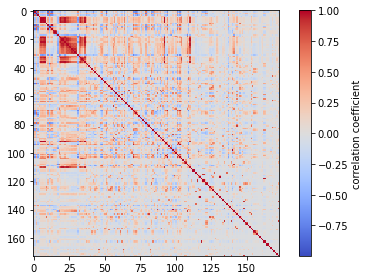

In [12]:
import matplotlib.pyplot as plt
import numpy as np

corrcoef = np.corrcoef(df_descriptors2.T.values.tolist())
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar(label='correlation coefficient')
tick_marks = np.arange(len(corrcoef))
#plt.xticks(tick_marks, df.columns, rotation=90)
#plt.yticks(tick_marks, df.columns)
plt.tight_layout()

In [13]:
threshold = 0.95
corrcoef = np.corrcoef(df_descriptors2.T.values.tolist())
selected_or_not = {}
for i, array in enumerate(corrcoef):
    if i not in selected_or_not.keys():
        selected_or_not[i] = True
    if selected_or_not[i]:
        for j, ary in enumerate(array): 
            if i < j:
                if abs(ary) >= threshold:
                    selected_or_not[j] = False

df_descriptors3 = df_descriptors2.iloc[:, [i for i, array in enumerate(corrcoef) if selected_or_not[i]]]
df_descriptors3

MaxEStateIndex  MinEStateIndex  ...  fr_unbrch_alkane  fr_urea
0         12.203893       -0.011059  ...               0.0      0.0
1          8.990151        0.150741  ...               0.0      0.0
2          9.393241       -0.207824  ...               0.0      0.0
3          9.119284        0.353611  ...               0.0      0.0
4          2.401620        0.311389  ...               0.0      0.0
..              ...             ...  ...               ...      ...
628        8.990463       -0.446481  ...               0.0      0.0
629       10.577593       -0.546019  ...               0.0      0.0
630        4.165093        1.049167  ...               0.0      0.0
631        9.567963        0.398056  ...               0.0      0.0
632       10.518632       -0.384815  ...               0.0      0.0

[633 rows x 151 columns]

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_descriptors3)
df_descriptors3 = pd.DataFrame(scaler.transform(df_descriptors3), columns=df_descriptors3.columns)
df_descriptors3

MaxEStateIndex  MinEStateIndex  ...  fr_unbrch_alkane   fr_urea
0          1.275384       -0.158755  ...          -0.09218 -0.126694
1          0.280348        0.061810  ...          -0.09218 -0.126694
2          0.405152       -0.426983  ...          -0.09218 -0.126694
3          0.320330        0.338362  ...          -0.09218 -0.126694
4         -1.759587        0.280805  ...          -0.09218 -0.126694
..              ...             ...  ...               ...       ...
628        0.280444       -0.752320  ...          -0.09218 -0.126694
629        0.771850       -0.888008  ...          -0.09218 -0.126694
630       -1.213583        1.286539  ...          -0.09218 -0.126694
631        0.459249        0.398948  ...          -0.09218 -0.126694
632        0.753595       -0.668256  ...          -0.09218 -0.126694

[633 rows x 151 columns]

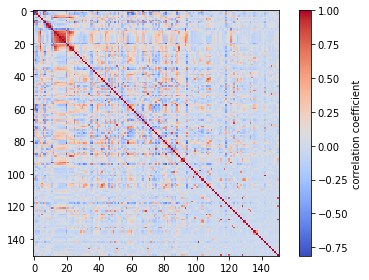

In [15]:
import matplotlib.pyplot as plt
import numpy as np

corrcoef = np.corrcoef(df_descriptors3.T.values.tolist())
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar(label='correlation coefficient')
tick_marks = np.arange(len(corrcoef))
#plt.xticks(tick_marks, df.columns, rotation=90)
#plt.yticks(tick_marks, df.columns)
plt.tight_layout()

In [16]:
df_descriptors = df_descriptors3

In [17]:
!date

Tue Feb  9 04:52:12 UTC 2021


# 分類用データに変換

In [18]:
import numpy as np

df_01 = pd.DataFrame(np.where(df > df.mean(), 1, 0), columns=df.columns)
df_01

PCCDB-ID  Open Babel SMILES  ...  Molecular refractivity  Melting point
0           1                  1  ...                       0              1
1           0                  1  ...                       0              0
2           1                  1  ...                       1              0
3           0                  1  ...                       0              1
4           0                  1  ...                       0              1
..        ...                ...  ...                     ...            ...
628         0                  0  ...                       1              0
629         1                  0  ...                       1              0
630         1                  1  ...                       0              1
631         0                  1  ...                       0              1
632         1                  0  ...                       1              1

[633 rows x 20 columns]

# トレーニングデータ、テストデータへの分割

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_descriptors, df_01, test_size=0.2)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((506, 151), (127, 151), (506, 20), (127, 20))

# Objective 1 : Molecular refractivity

## RandomForest を用いた特徴選択

In [21]:
import optuna
from scikitallstars import all_sklearn

objective1_fs = all_sklearn.Objective(X_train, y_train['Molecular refractivity'])
objective1_fs.set_model_names(['RandomForest'])

optuna.logging.set_verbosity(optuna.logging.WARN)
study1_fs = optuna.create_study(direction='maximize')
study1_fs.optimize(objective1_fs, timeout=100, n_trials=100, show_progress_bar=True)

/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



In [22]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'objective1_fs.pkl', 'wb') as obj:
  pickle.dump(objective1_fs , obj)

In [23]:
feature_importances_df = pd.DataFrame(
    objective1_fs.best_models["RandomForest"].model.feature_importances_, 
    columns=["RF feature importance"],
    index=X_train.columns
    ).dropna().sort_values("RF feature importance", ascending=False)

feature_importances_df.style.bar(subset=["RF feature importance"], align='mid')

In [24]:
from sklearn.feature_selection import SelectFromModel

selector1 = SelectFromModel(estimator=objective1_fs.best_model.model).fit(X_train, y_train['Molecular refractivity'])
X_train1 = X_train.iloc[:, selector1.get_support()]
X_test1 = X_test.iloc[:, selector1.get_support()]

In [25]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'selector1.pkl', 'wb') as obj:
  pickle.dump(selector1 , obj)

In [26]:
X_train1

MinEStateIndex  MinAbsEStateIndex  ...  NumHAcceptors   MolLogP
592       -1.444520          -0.811912  ...      -0.279993  0.496314
62         1.203738           1.391515  ...      -0.893264  0.902354
232        0.335932          -0.222153  ...       0.946550 -1.261314
379       -0.939923          -0.646209  ...       2.173093 -0.935163
614       -1.691600          -0.996157  ...       0.946550 -1.889804
..              ...                ...  ...            ...       ...
428        1.418693           1.791220  ...      -1.506535  0.956383
71        -0.138346          -1.104063  ...      -0.279993  0.738805
506       -0.873301          -0.840781  ...       1.559821 -0.843703
526        0.421163          -0.063667  ...      -0.893264  0.101238
362       -1.876506          -0.252841  ...       0.333279 -0.059986

[506 rows x 29 columns]

In [27]:
import pandas as pd

df_concat = pd.concat([X_train1, y_train['Molecular refractivity']], axis=1)

#pd.plotting.scatter_matrix(df_concat, figsize=(12, 12)) 
#plt.show()

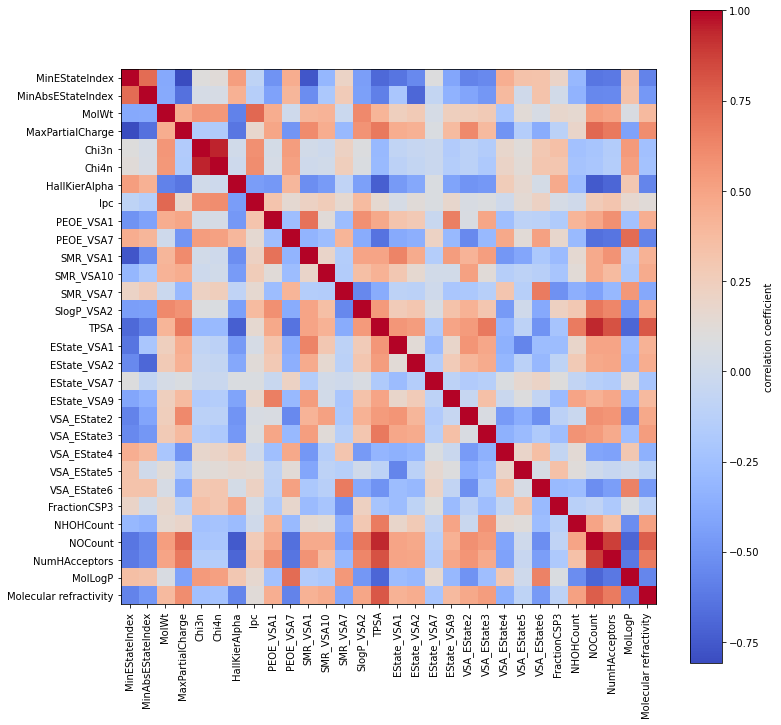

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 12))
corrcoef = np.corrcoef(df_concat.T.values.tolist())
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar(label='correlation coefficient')
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, df_concat.columns, rotation=90)
plt.yticks(tick_marks, df_concat.columns)
#plt.tight_layout()
plt.show()

In [29]:
pcaumap1 = all_sklearn.PCAUmap()
pcaumap1.fit(pd.concat([X_train1, X_test1]))

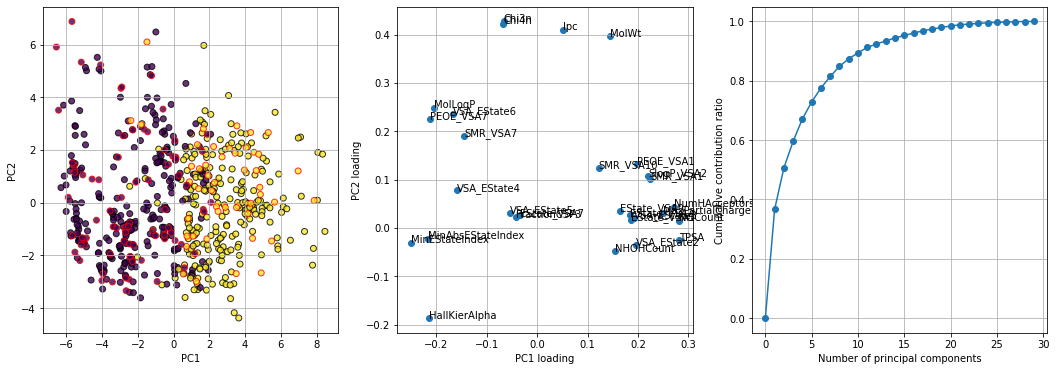

In [30]:
all_sklearn.pca_summary(pcaumap1.pca, X_train1, y_train['Molecular refractivity'], X_test1, y_test=y_test['Molecular refractivity'])

inside function
   (0, 0)	1.0
  (0, 49)	0.46632227
  (0, 53)	0.5318732
  (0, 91)	0.0933685
  (0, 145)	0.11119832
  (0, 174)	0.36041197
  (0, 224)	0.13453397
  (0, 358)	0.14519826
  (0, 373)	0.09521186
  (0, 404)	0.10007582
  (0, 413)	0.4552497
  (0, 454)	0.45790365
  (0, 521)	0.61735207
  (0, 570)	0.08087031
  (0, 589)	0.25732285
  (1, 1)	1.0
  (1, 58)	0.69369143
  (1, 138)	0.20654161
  (1, 185)	0.21083727
  (1, 204)	0.23446696
  (1, 372)	0.28622144
  (1, 407)	0.20601062
  (1, 427)	0.23520626
  (1, 470)	0.20562297
  (1, 490)	0.23565544
  :	:
  (504, 318)	0.40079474
  (504, 354)	0.18587993
  (504, 478)	0.20596357
  (504, 504)	1.0
  (504, 529)	0.42586198
  (504, 552)	0.27028832
  (504, 577)	0.24121556
  (504, 590)	0.26246935
  (504, 602)	0.20528306
  (504, 604)	0.1974897
  (505, 9)	0.43700397
  (505, 19)	0.2868202
  (505, 77)	0.26149854
  (505, 91)	0.31280288
  (505, 145)	0.23837177
  (505, 159)	0.2534312
  (505, 164)	0.24259733
  (505, 180)	0.28412536
  (505, 210)	0.2430204
  (505, 304)

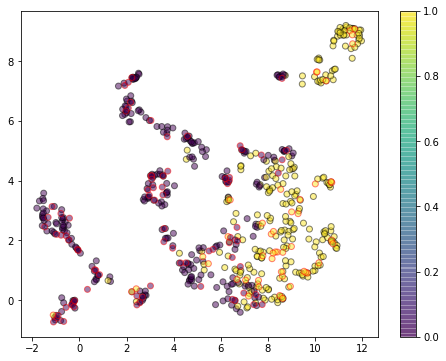

In [31]:
all_sklearn.show_pcaumap(pcaumap1, X_train1, y_train['Molecular refractivity'], X_test1, y_test=y_test['Molecular refractivity'])

In [32]:
!date

Tue Feb  9 04:53:41 UTC 2021


## 選択された特徴を用いた予測

In [33]:
import optuna
from scikitallstars import all_sklearn
from sklearn.model_selection import train_test_split

objective1 = all_sklearn.Objective(X_train1, y_train['Molecular refractivity'])

optuna.logging.set_verbosity(optuna.logging.WARN)
model_names = objective1.get_model_names()
for model_name in model_names:
    objective1.set_model_names([model_name])
    study1 = optuna.create_study(direction='maximize')
    study1.optimize(objective1, timeout=100, n_trials=100, show_progress_bar=True)

objective1.set_model_names(model_names)
study1 = optuna.create_study(direction='maximize')
study1.optimize(objective1, timeout=100, n_trials=100, show_progress_bar=True)

/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



In [34]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'objective1.pkl', 'wb') as obj:
  pickle.dump(objective1 , obj)

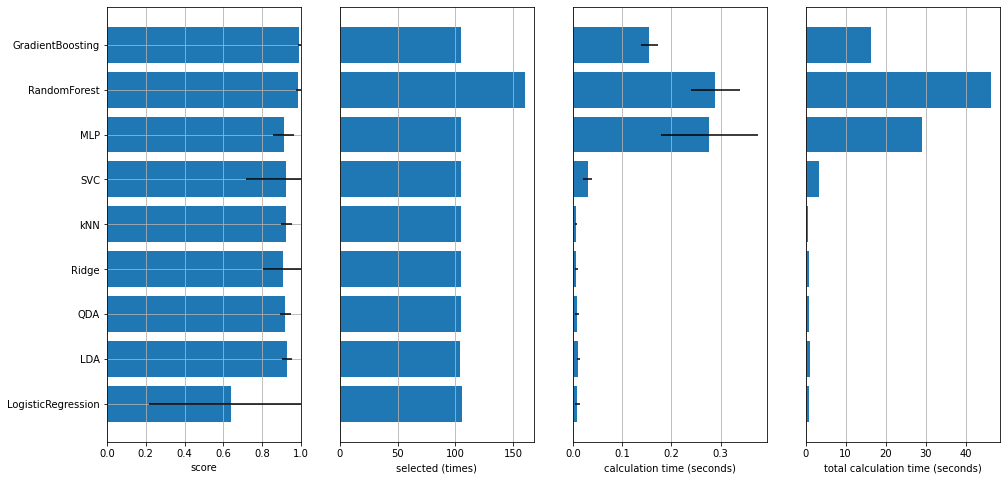

In [35]:
all_sklearn.objective_summary(objective1)

In [36]:
objective1.best_scores

{'GradientBoosting': 1.0,
 'LDA': 0.9807692307692307,
 'LogisticRegression': 0.9702970297029702,
 'MLP': 0.98989898989899,
 'QDA': 0.9906542056074767,
 'RandomForest': 1.0,
 'Ridge': 0.9909909909909909,
 'SVC': 1.0,
 'kNN': 0.98}

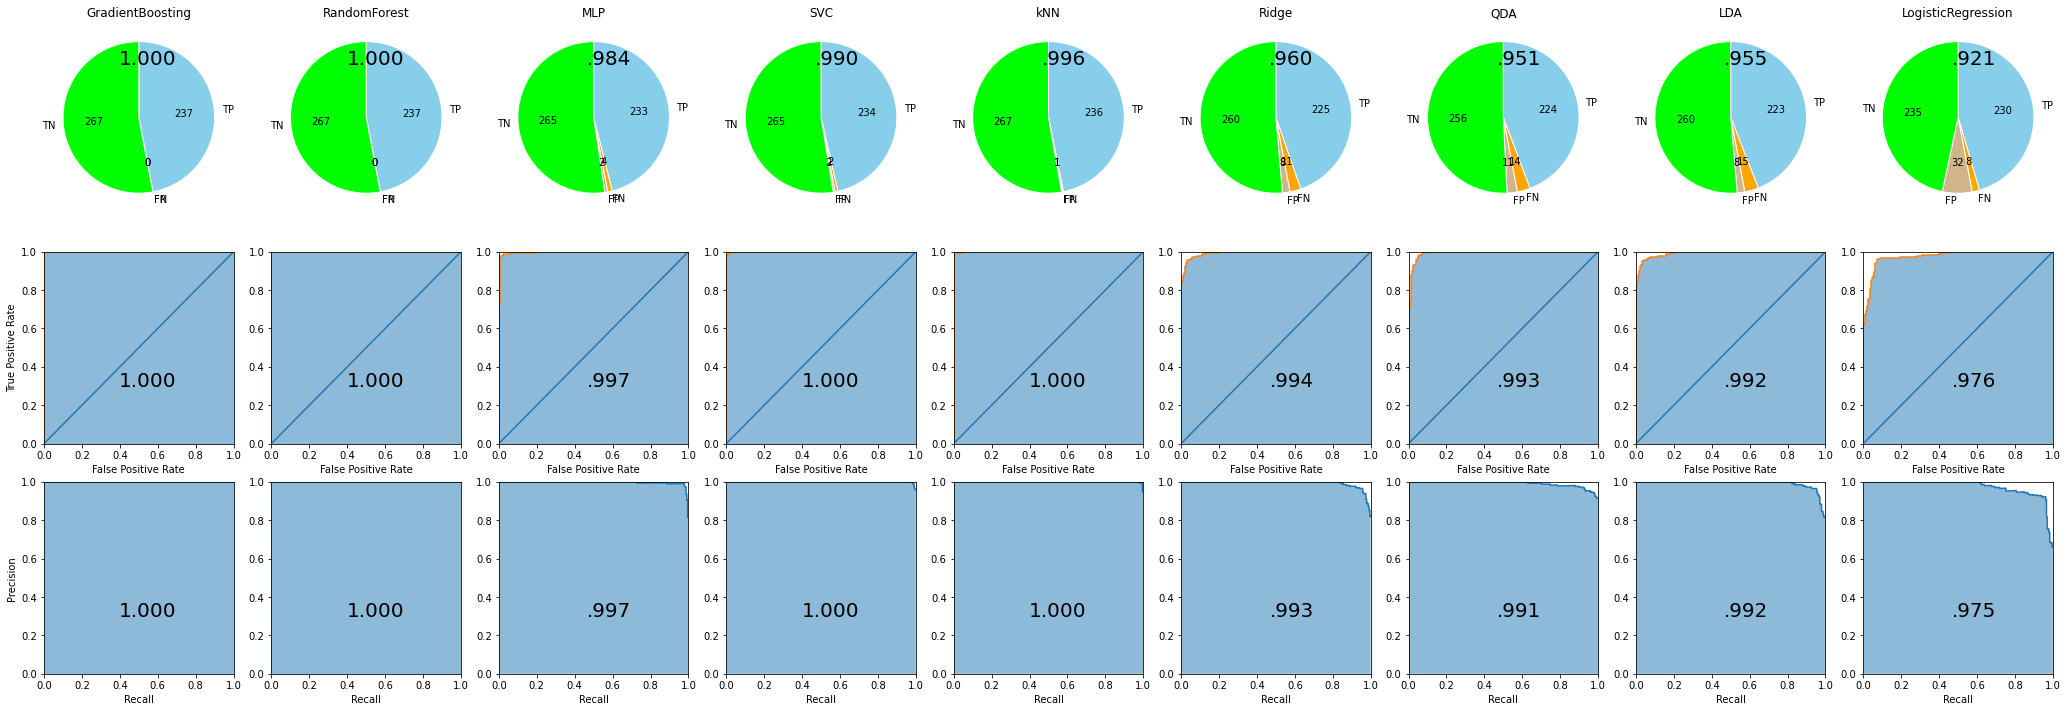

In [37]:
all_sklearn.show_allsklearn_metrics(objective1, X_train1, y_train['Molecular refractivity'])

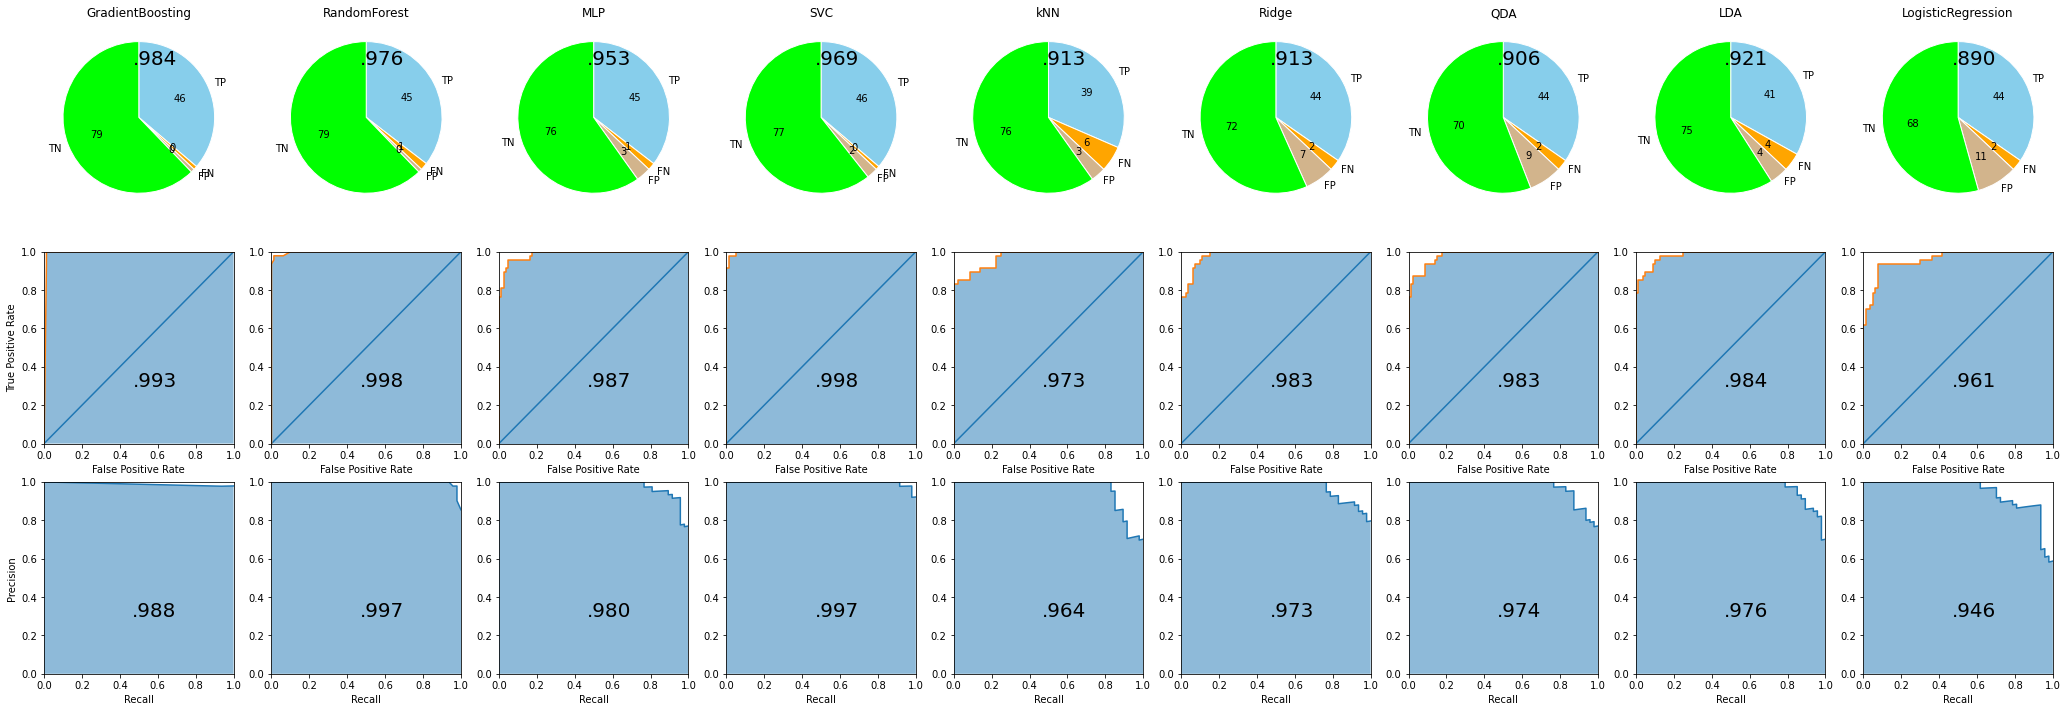

In [38]:
all_sklearn.show_allsklearn_metrics(objective1, X_test1, y_test['Molecular refractivity'])

inside function
   (0, 0)	1.0
  (0, 49)	0.46632227
  (0, 53)	0.5318732
  (0, 91)	0.0933685
  (0, 145)	0.11119832
  (0, 174)	0.36041197
  (0, 224)	0.13453397
  (0, 358)	0.14519826
  (0, 373)	0.09521186
  (0, 404)	0.10007582
  (0, 413)	0.4552497
  (0, 454)	0.45790365
  (0, 521)	0.61735207
  (0, 570)	0.08087031
  (0, 589)	0.25732285
  (1, 1)	1.0
  (1, 58)	0.69369143
  (1, 138)	0.20654161
  (1, 185)	0.21083727
  (1, 204)	0.23446696
  (1, 372)	0.28622144
  (1, 407)	0.20601062
  (1, 427)	0.23520626
  (1, 470)	0.20562297
  (1, 490)	0.23565544
  :	:
  (504, 318)	0.40079474
  (504, 354)	0.18587993
  (504, 478)	0.20596357
  (504, 504)	1.0
  (504, 529)	0.42586198
  (504, 552)	0.27028832
  (504, 577)	0.24121556
  (504, 590)	0.26246935
  (504, 602)	0.20528306
  (504, 604)	0.1974897
  (505, 9)	0.43700397
  (505, 19)	0.2868202
  (505, 77)	0.26149854
  (505, 91)	0.31280288
  (505, 145)	0.23837177
  (505, 159)	0.2534312
  (505, 164)	0.24259733
  (505, 180)	0.28412536
  (505, 210)	0.2430204
  (505, 304)

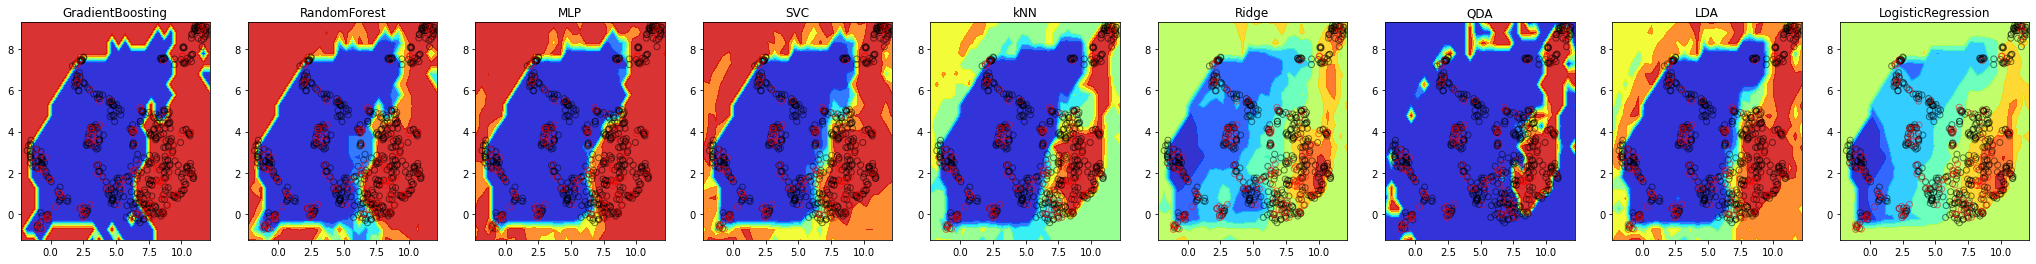

In [39]:
all_sklearn.show_allsklearn_pcaumap(objective1, pcaumap1, X_train1, X_test=X_test1)

In [40]:
!date

Tue Feb  9 04:56:43 UTC 2021


In [41]:
stacking_model1 = all_sklearn.stacking(objective1)
stacking_model1.fit(X_train1, y_train['Molecular refractivity'])
stacking_model1.score(X_test1, y_test['Molecular refractivity'])

0.984251968503937

In [42]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'stacking_model1.pkl', 'wb') as obj:
  pickle.dump(stacking_model1 , obj)

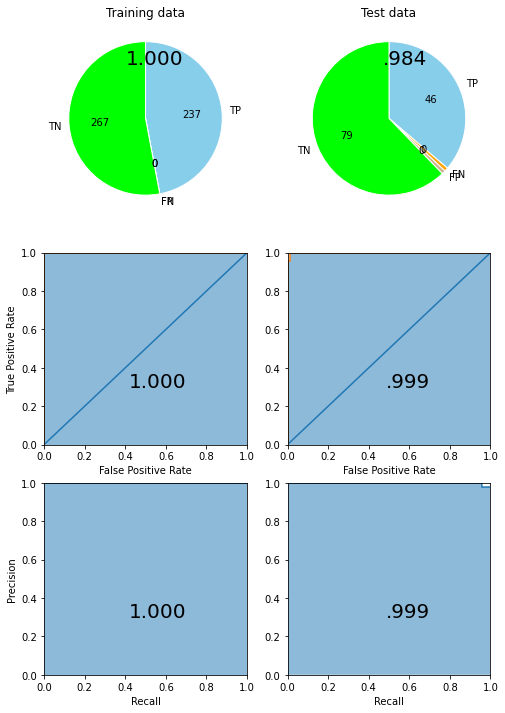

In [43]:
all_sklearn.show_metrics(stacking_model1, X_train1, X_test1, y_train['Molecular refractivity'], y_test['Molecular refractivity'])

inside function
   (0, 0)	1.0
  (0, 49)	0.46632227
  (0, 53)	0.5318732
  (0, 91)	0.0933685
  (0, 145)	0.11119832
  (0, 174)	0.36041197
  (0, 224)	0.13453397
  (0, 358)	0.14519826
  (0, 373)	0.09521186
  (0, 404)	0.10007582
  (0, 413)	0.4552497
  (0, 454)	0.45790365
  (0, 521)	0.61735207
  (0, 570)	0.08087031
  (0, 589)	0.25732285
  (1, 1)	1.0
  (1, 58)	0.69369143
  (1, 138)	0.20654161
  (1, 185)	0.21083727
  (1, 204)	0.23446696
  (1, 372)	0.28622144
  (1, 407)	0.20601062
  (1, 427)	0.23520626
  (1, 470)	0.20562297
  (1, 490)	0.23565544
  :	:
  (504, 318)	0.40079474
  (504, 354)	0.18587993
  (504, 478)	0.20596357
  (504, 504)	1.0
  (504, 529)	0.42586198
  (504, 552)	0.27028832
  (504, 577)	0.24121556
  (504, 590)	0.26246935
  (504, 602)	0.20528306
  (504, 604)	0.1974897
  (505, 9)	0.43700397
  (505, 19)	0.2868202
  (505, 77)	0.26149854
  (505, 91)	0.31280288
  (505, 145)	0.23837177
  (505, 159)	0.2534312
  (505, 164)	0.24259733
  (505, 180)	0.28412536
  (505, 210)	0.2430204
  (505, 304)

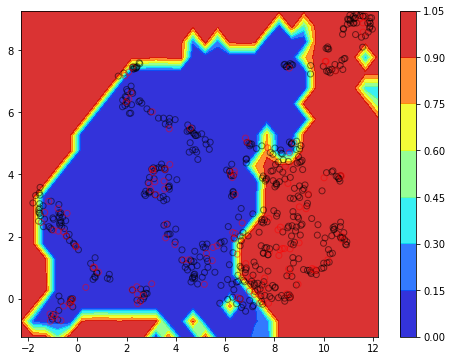

In [44]:
all_sklearn.show_pcaumap(pcaumap1, X_train1, X_test=X_test1, model=stacking_model1)

In [45]:
!date

Tue Feb  9 04:57:00 UTC 2021


In [46]:
import shap 

sample_size = 100
pred_func = lambda X: stacking_model1.predict(X).ravel()
explainer1 = shap.KernelExplainer(pred_func, shap.kmeans(X_test1, sample_size))
shap_values1 = explainer1.shap_values(X_test1)

In [47]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'shap_values1.pkl', 'wb') as obj:
  pickle.dump(shap_values1 , obj)

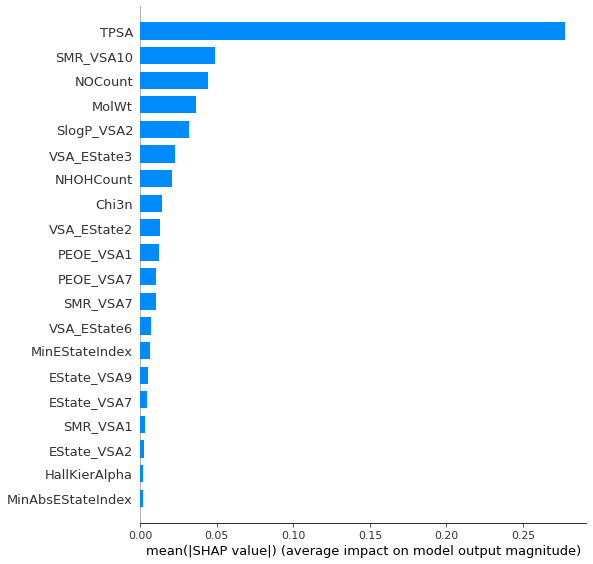

In [48]:
shap.summary_plot(shap_values1, features=X_test1, plot_type="bar")

In [49]:
global_shap_values = np.abs(shap_values1).mean(0)
shap_corr = [np.corrcoef(shap_values1[:, i], X_test1.iloc[:, i])[0, 1] for i in range(len(shap_values1.T))]
global_shap_coefs = np.array(global_shap_values) * np.array(shap_corr)

global_shap_coefs_df = pd.DataFrame(
    global_shap_coefs, 
    columns=["Global SHAP coef"],
    index=X_test1.columns
    ).dropna().sort_values("Global SHAP coef", ascending=False)

global_shap_coefs_df.style.bar(subset=["Global SHAP coef"], align='mid')

not enough data in bin #6 for feature NHOHCount, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #8 for feature NOCount, so it'll be ignored. Try increasing the number of records to plot.


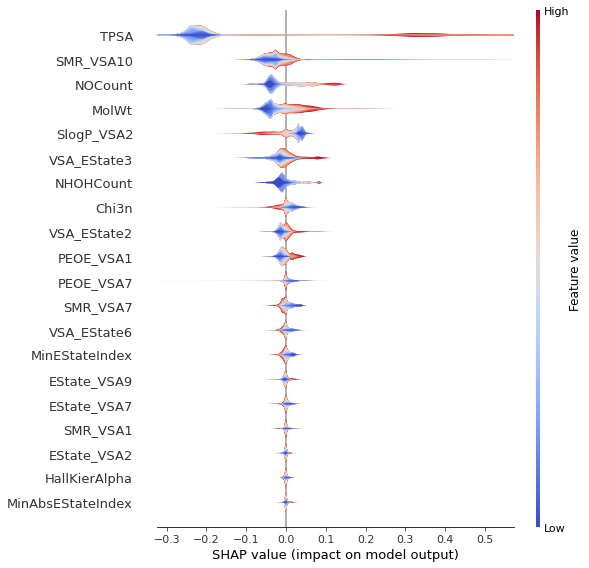

In [50]:
shap.summary_plot(shap_values1, features=X_test1, plot_type="layered_violin")

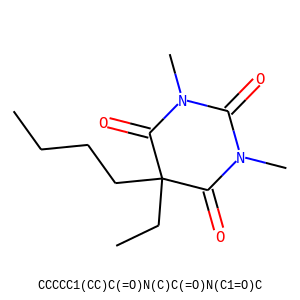

In [51]:
from rdkit import Chem
from rdkit.Chem import Draw

index = 0

smile = df['Open Babel SMILES'][X_test1.index[index]]
mol = Chem.MolFromSmiles(smile)
mol.SetProp("_Name", smile)

# ノートブック上に描画
Draw.MolToImage(mol, legend=mol.GetProp("_Name"))

In [52]:
shap.initjs()
shap.force_plot(explainer1.expected_value, shap_values1[index,:], X_test1.iloc[index, :], link="logit")

In [53]:
shap.initjs()
shap.force_plot(explainer1.expected_value, shap_values1, X_test1)

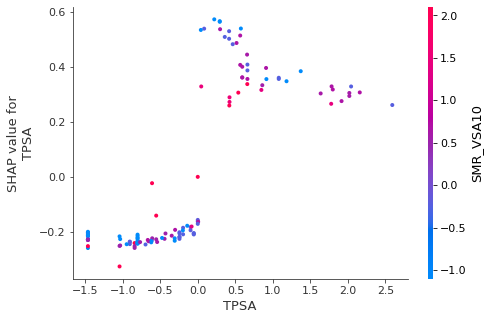

In [54]:
shap.dependence_plot("TPSA", shap_values1, X_test1)

In [55]:
!date

Tue Feb  9 05:20:26 UTC 2021


# Objective 2: HOMO-LUMO gap

## RandomForest を用いた特徴選択

In [56]:
import optuna
from scikitallstars import all_sklearn
from sklearn.model_selection import train_test_split

objective2_fs = all_sklearn.Objective(X_train, y_train["HOMO-LUMO gap"])
objective2_fs.set_model_names(['RandomForest'])

optuna.logging.set_verbosity(optuna.logging.WARN)
study2_fs = optuna.create_study(direction='maximize')
study2_fs.optimize(objective2_fs, timeout=100, n_trials=100, show_progress_bar=True)

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


In [57]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'objective2_fs.pkl', 'wb') as obj:
  pickle.dump(objective2_fs , obj)

In [58]:
feature_importances_df = pd.DataFrame(
    objective2_fs.best_models["RandomForest"].model.feature_importances_, 
    columns=["RF feature importance"],
    index=X_train.columns
    ).dropna().sort_values("RF feature importance", ascending=False)

feature_importances_df.style.bar(subset=["RF feature importance"], align='mid')

In [59]:
from sklearn.feature_selection import SelectFromModel

selector2 = SelectFromModel(estimator=objective2_fs.best_models["RandomForest"].model).fit(X_train, y_train["HOMO-LUMO gap"])
X_train2 = X_train.iloc[:, selector2.get_support()]
X_test2 = X_test.iloc[:, selector2.get_support()]

In [60]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'selector2.pkl', 'wb') as obj:
  pickle.dump(selector2 , obj)

In [61]:
X_train2

MaxEStateIndex  MinEStateIndex  ...  fr_ketone_Topliss  fr_nitro
592        0.848839       -1.444520  ...          -0.304672 -0.247387
62        -0.853063        1.203738  ...          -0.304672 -0.247387
232        0.130360        0.335932  ...          -0.304672 -0.247387
379        0.947229       -0.939923  ...          -0.304672  2.499910
614        0.868706       -1.691600  ...          -0.304672 -0.247387
..              ...             ...  ...                ...       ...
428       -1.786464        1.418693  ...          -0.304672 -0.247387
71         1.076101       -0.138346  ...           2.531470 -0.247387
506        1.111244       -0.873301  ...          -0.304672 -0.247387
526        0.347270        0.421163  ...          -0.304672 -0.247387
362        0.968294       -1.876506  ...          -0.304672 -0.247387

[506 rows x 60 columns]

In [62]:
import pandas as pd

df_concat = pd.concat([X_train2, y_train["HOMO-LUMO gap"]], axis=1)

#pd.plotting.scatter_matrix(df_concat, figsize=(12, 12)) 
#plt.show()

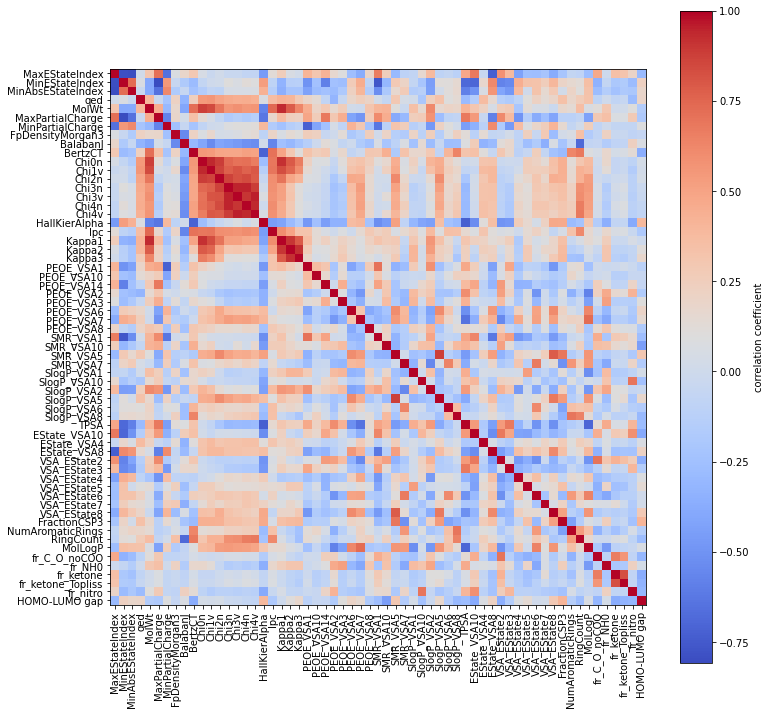

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 12))
corrcoef = np.corrcoef(df_concat.T.values.tolist())
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar(label='correlation coefficient')
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, df_concat.columns, rotation=90)
plt.yticks(tick_marks, df_concat.columns)
#plt.tight_layout()
plt.show()

In [64]:
pcaumap2 = all_sklearn.PCAUmap()
pcaumap2.fit(pd.concat([X_train2, X_test2]))

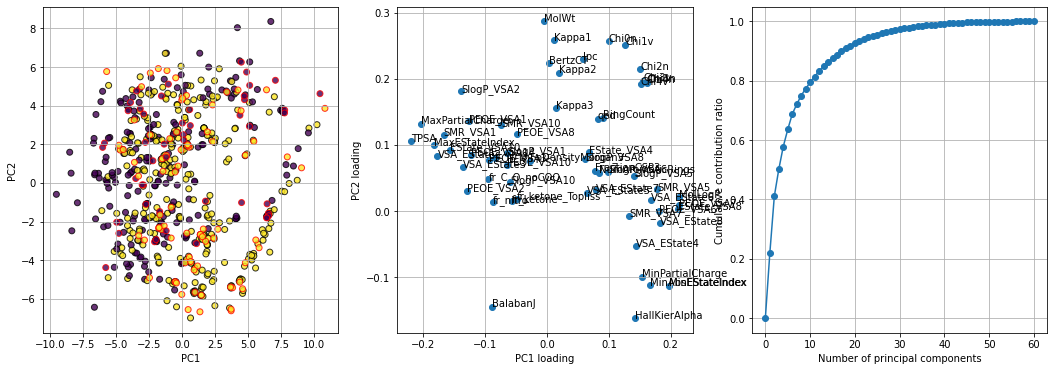

In [65]:
all_sklearn.pca_summary(pcaumap2.pca, X_train2, y_train['HOMO-LUMO gap'], X_test2, y_test['HOMO-LUMO gap'])

inside function
   (0, 0)	1.0
  (0, 49)	0.4512076
  (0, 53)	0.45047367
  (0, 145)	0.13861127
  (0, 174)	0.2859172
  (0, 224)	0.22229433
  (0, 243)	0.14638291
  (0, 263)	0.15030815
  (0, 302)	0.14155112
  (0, 413)	0.43174136
  (0, 454)	0.4295927
  (0, 518)	0.14564846
  (0, 521)	0.49119925
  (0, 589)	0.23438087
  (0, 627)	0.18759118
  (1, 1)	1.0
  (1, 58)	0.6744648
  (1, 65)	0.13027501
  (1, 138)	0.20825101
  (1, 185)	0.12748744
  (1, 204)	0.22897525
  (1, 372)	0.4420371
  (1, 390)	0.2784925
  (1, 427)	0.22929795
  (1, 474)	0.153851
  :	:
  (504, 318)	0.42637935
  (504, 354)	0.17711723
  (504, 478)	0.21000303
  (504, 504)	1.0
  (504, 529)	0.4332376
  (504, 552)	0.3569635
  (504, 571)	0.21378753
  (504, 577)	0.23337609
  (504, 590)	0.37425408
  (504, 604)	0.16883065
  (505, 9)	0.37716654
  (505, 47)	0.24121636
  (505, 77)	0.3563569
  (505, 91)	0.26351956
  (505, 148)	0.24473059
  (505, 156)	0.2450156
  (505, 159)	0.26871273
  (505, 213)	0.2812588
  (505, 264)	0.23646021
  (505, 347)	0.350

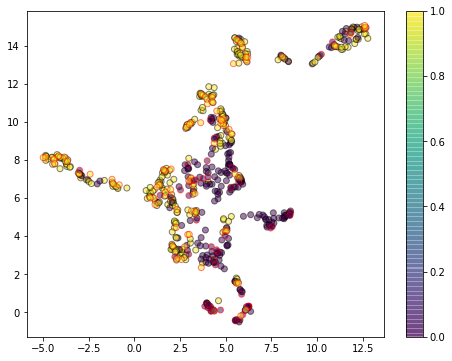

In [66]:
all_sklearn.show_pcaumap(pcaumap2, X_train2, y_train['HOMO-LUMO gap'], X_test2, y_test['HOMO-LUMO gap'])

In [67]:
!date

Tue Feb  9 05:21:24 UTC 2021


## 選択された特徴を用いた予測

In [68]:
import optuna
from scikitallstars import all_sklearn

objective2 = all_sklearn.Objective(X_train2, y_train["HOMO-LUMO gap"])

optuna.logging.set_verbosity(optuna.logging.WARN)
model_names = objective2.get_model_names()
for model_name in model_names:
    objective2.set_model_names([model_name])
    study2 = optuna.create_study(direction='maximize')
    study2.optimize(objective2, timeout=100, n_trials=100, show_progress_bar=True)

objective2.set_model_names(model_names)
study2 = optuna.create_study(direction='maximize')
study2.optimize(objective2, timeout=100, n_trials=100, show_progress_bar=True)

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are co

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear


In [69]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'objective2.pkl', 'wb') as obj:
  pickle.dump(objective2 , obj)

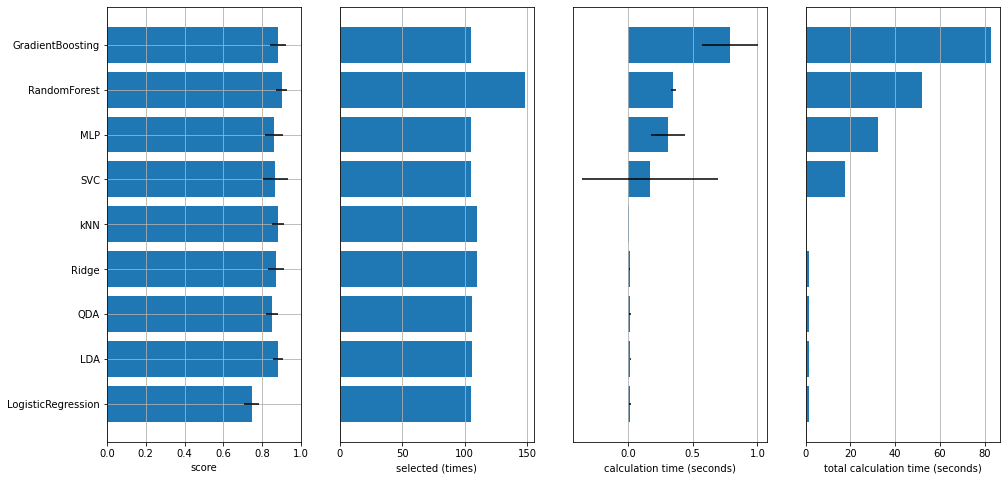

In [70]:
all_sklearn.objective_summary(objective2)

In [71]:
objective2.best_scores

{'GradientBoosting': 0.944,
 'LDA': 0.9411764705882353,
 'LogisticRegression': 0.8166666666666667,
 'MLP': 0.9402985074626865,
 'QDA': 0.9219858156028369,
 'RandomForest': 0.975609756097561,
 'Ridge': 0.9375,
 'SVC': 0.9491525423728815,
 'kNN': 0.9481481481481482}

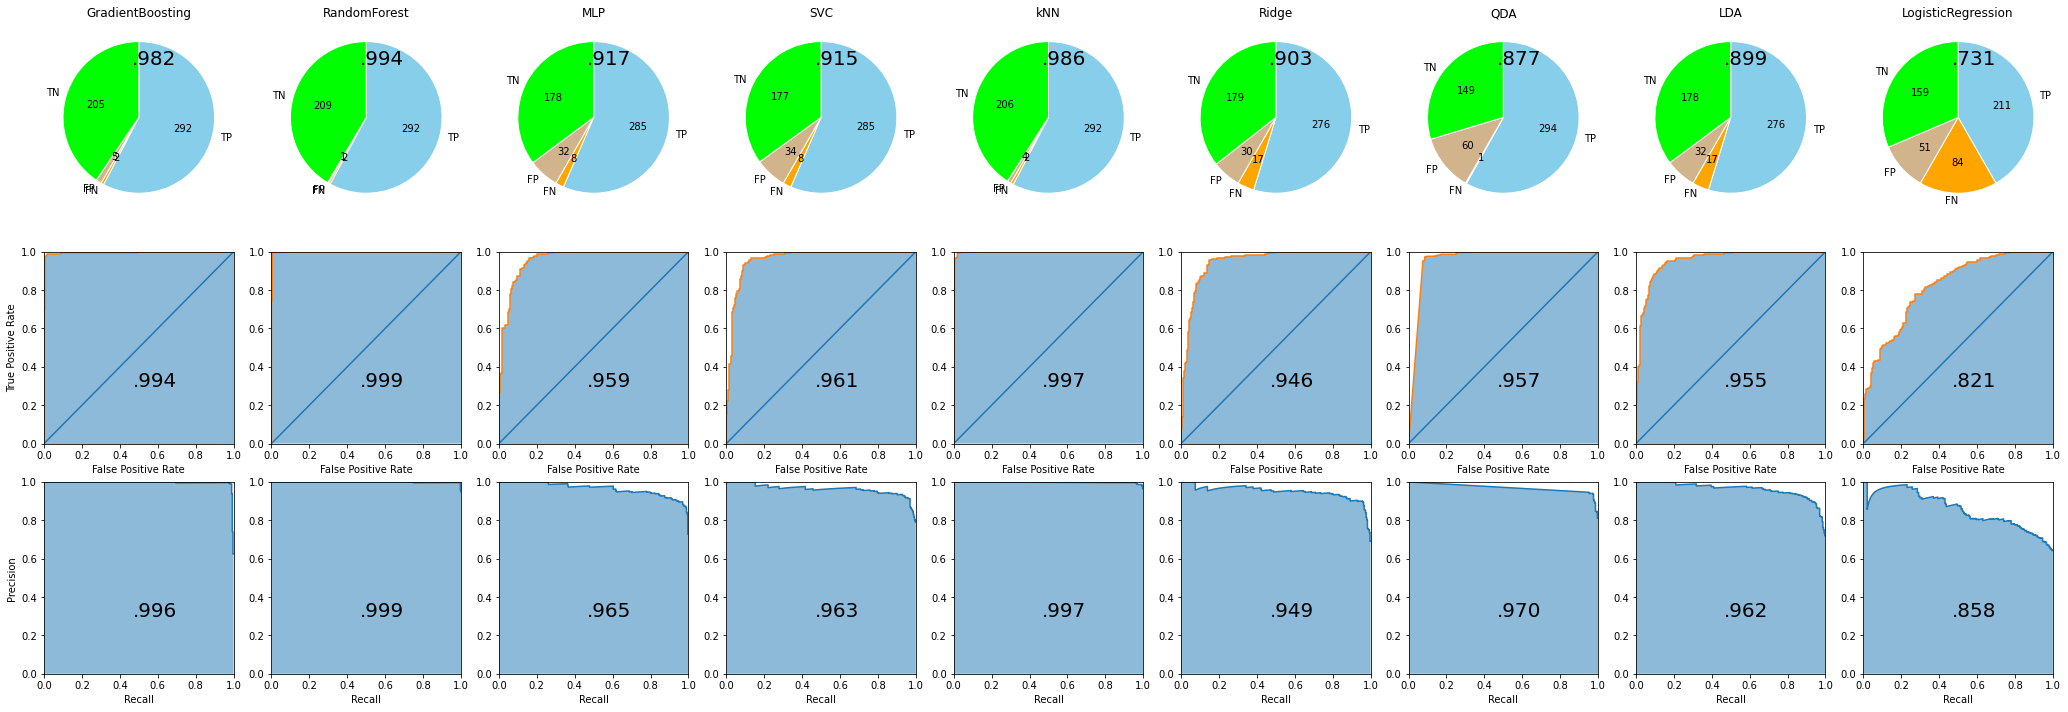

In [72]:
all_sklearn.show_allsklearn_metrics(objective2, X_train2, y_train["HOMO-LUMO gap"])

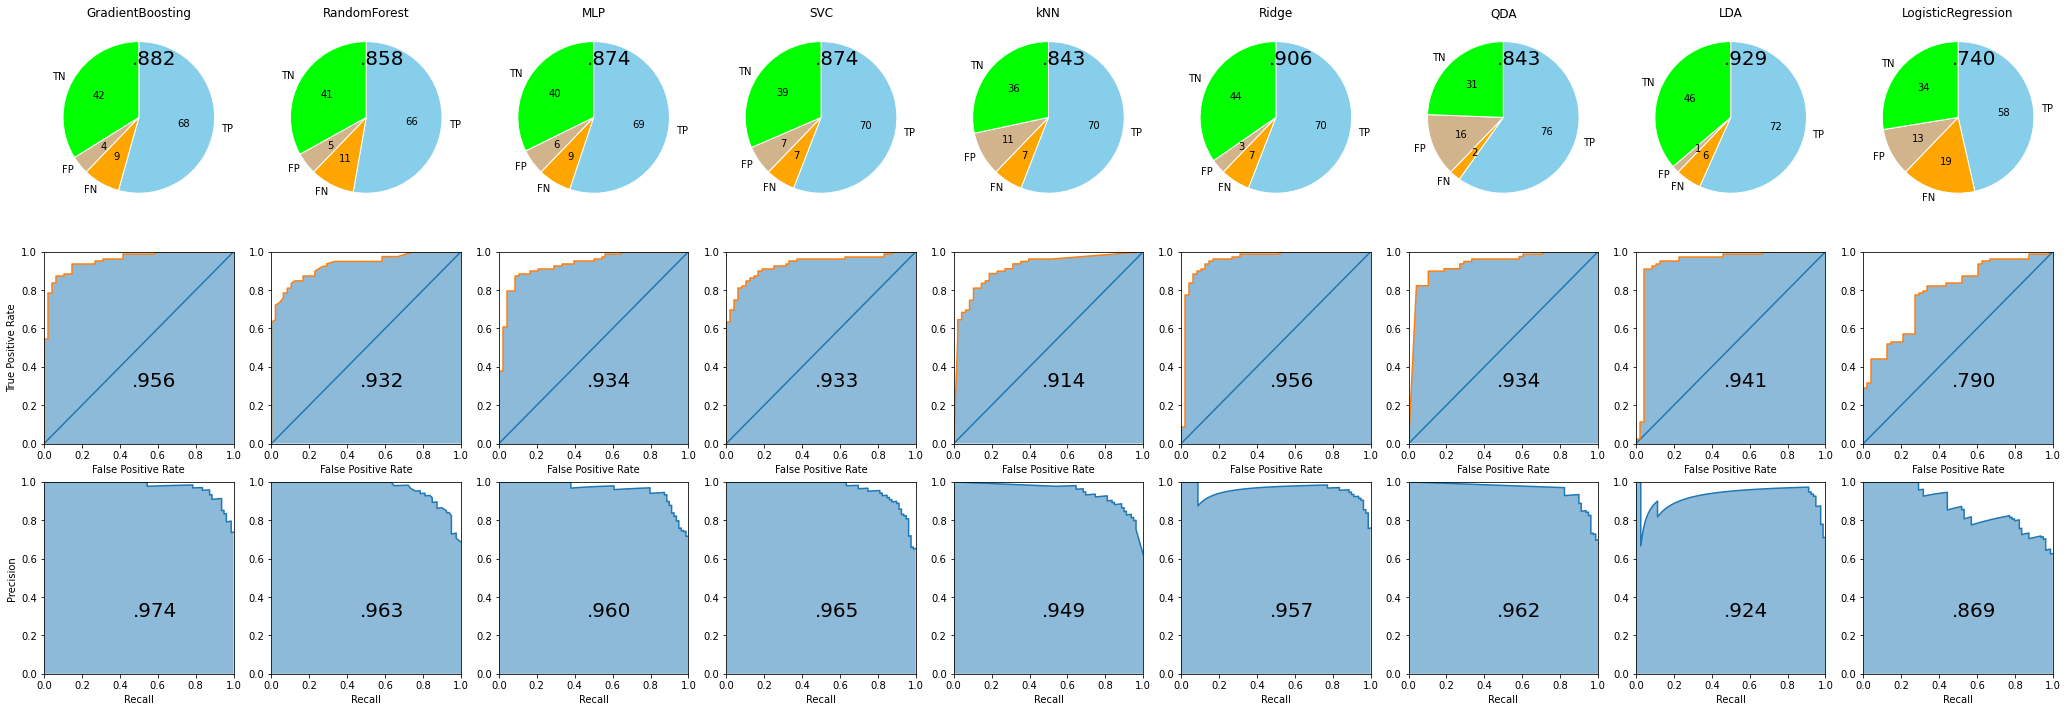

In [73]:
all_sklearn.show_allsklearn_metrics(objective2, X_test2, y_test["HOMO-LUMO gap"])

inside function
   (0, 0)	1.0
  (0, 49)	0.4512076
  (0, 53)	0.45047367
  (0, 145)	0.13861127
  (0, 174)	0.2859172
  (0, 224)	0.22229433
  (0, 243)	0.14638291
  (0, 263)	0.15030815
  (0, 302)	0.14155112
  (0, 413)	0.43174136
  (0, 454)	0.4295927
  (0, 518)	0.14564846
  (0, 521)	0.49119925
  (0, 589)	0.23438087
  (0, 627)	0.18759118
  (1, 1)	1.0
  (1, 58)	0.6744648
  (1, 65)	0.13027501
  (1, 138)	0.20825101
  (1, 185)	0.12748744
  (1, 204)	0.22897525
  (1, 372)	0.4420371
  (1, 390)	0.2784925
  (1, 427)	0.22929795
  (1, 474)	0.153851
  :	:
  (504, 318)	0.42637935
  (504, 354)	0.17711723
  (504, 478)	0.21000303
  (504, 504)	1.0
  (504, 529)	0.4332376
  (504, 552)	0.3569635
  (504, 571)	0.21378753
  (504, 577)	0.23337609
  (504, 590)	0.37425408
  (504, 604)	0.16883065
  (505, 9)	0.37716654
  (505, 47)	0.24121636
  (505, 77)	0.3563569
  (505, 91)	0.26351956
  (505, 148)	0.24473059
  (505, 156)	0.2450156
  (505, 159)	0.26871273
  (505, 213)	0.2812588
  (505, 264)	0.23646021
  (505, 347)	0.350

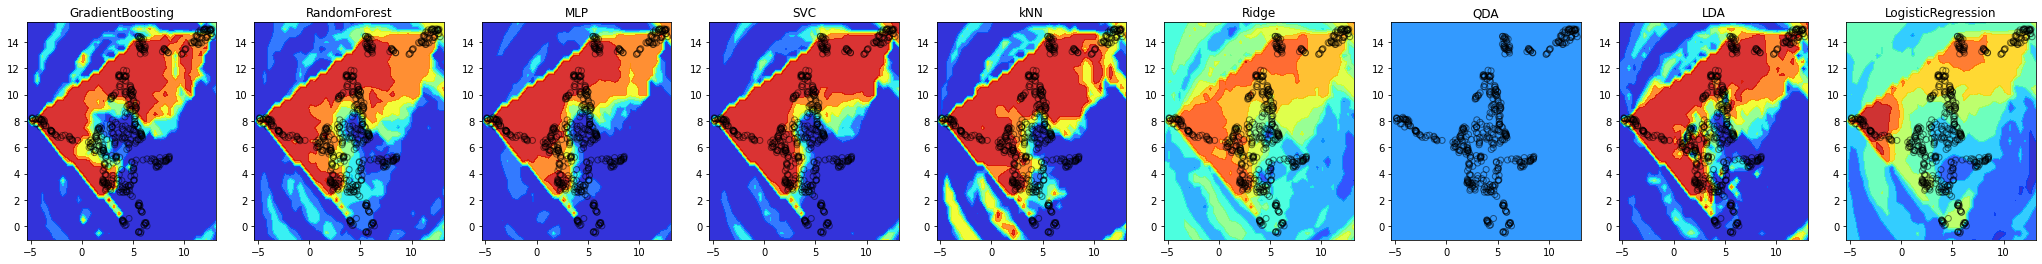

In [74]:
all_sklearn.show_allsklearn_pcaumap(objective2, pcaumap2, X_train2, X_test2)

In [75]:
!date

Tue Feb  9 05:26:54 UTC 2021


In [76]:
stacking_model2 = all_sklearn.stacking(objective2)
stacking_model2.fit(X_train2, y_train["HOMO-LUMO gap"])
stacking_model2.score(X_test2, y_test["HOMO-LUMO gap"])

Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear


0.905511811023622

In [77]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'stacking_model2.pkl', 'wb') as obj:
  pickle.dump(stacking_model2 , obj)

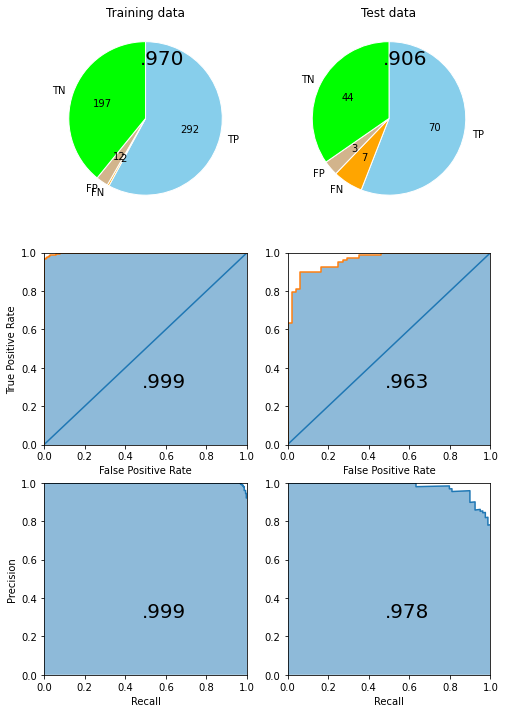

In [78]:
all_sklearn.show_metrics(stacking_model2, X_train2, X_test2, y_train['HOMO-LUMO gap'], y_test['HOMO-LUMO gap'])

inside function
   (0, 0)	1.0
  (0, 49)	0.4512076
  (0, 53)	0.45047367
  (0, 145)	0.13861127
  (0, 174)	0.2859172
  (0, 224)	0.22229433
  (0, 243)	0.14638291
  (0, 263)	0.15030815
  (0, 302)	0.14155112
  (0, 413)	0.43174136
  (0, 454)	0.4295927
  (0, 518)	0.14564846
  (0, 521)	0.49119925
  (0, 589)	0.23438087
  (0, 627)	0.18759118
  (1, 1)	1.0
  (1, 58)	0.6744648
  (1, 65)	0.13027501
  (1, 138)	0.20825101
  (1, 185)	0.12748744
  (1, 204)	0.22897525
  (1, 372)	0.4420371
  (1, 390)	0.2784925
  (1, 427)	0.22929795
  (1, 474)	0.153851
  :	:
  (504, 318)	0.42637935
  (504, 354)	0.17711723
  (504, 478)	0.21000303
  (504, 504)	1.0
  (504, 529)	0.4332376
  (504, 552)	0.3569635
  (504, 571)	0.21378753
  (504, 577)	0.23337609
  (504, 590)	0.37425408
  (504, 604)	0.16883065
  (505, 9)	0.37716654
  (505, 47)	0.24121636
  (505, 77)	0.3563569
  (505, 91)	0.26351956
  (505, 148)	0.24473059
  (505, 156)	0.2450156
  (505, 159)	0.26871273
  (505, 213)	0.2812588
  (505, 264)	0.23646021
  (505, 347)	0.350

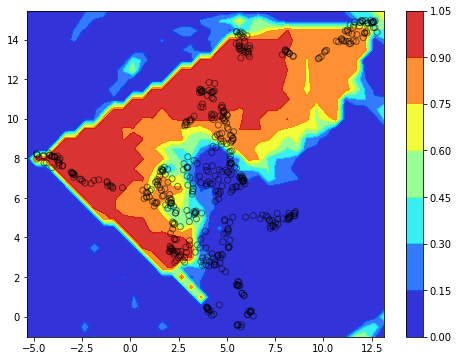

In [79]:
all_sklearn.show_pcaumap(pcaumap2, X_train2, X_test2, model=stacking_model2)

In [80]:
!date

Tue Feb  9 05:27:19 UTC 2021


In [81]:
import shap 

sample_size = 100
pred_func = lambda X: stacking_model2.predict(X).ravel()
explainer2 = shap.KernelExplainer(pred_func, shap.kmeans(X_test2, sample_size))
shap_values2 = explainer2.shap_values(X_test2)

In [82]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'shap_values2.pkl', 'wb') as obj:
  pickle.dump(shap_values2 , obj)

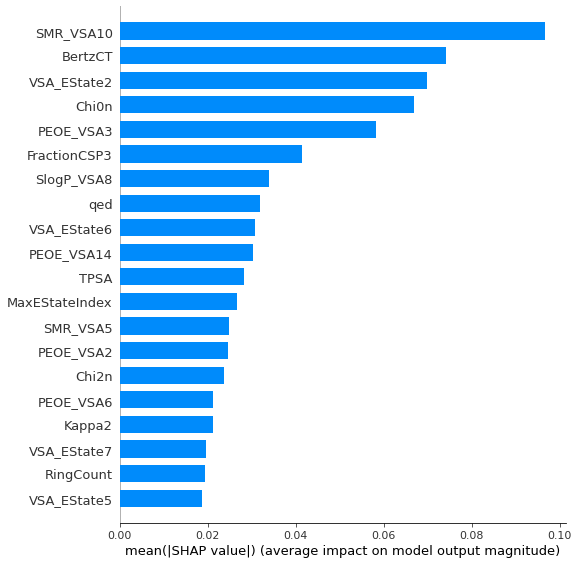

In [83]:
shap.summary_plot(shap_values2, features=X_test2, plot_type="bar")

In [84]:
global_shap_values = np.abs(shap_values2).mean(0)
shap_corr = [np.corrcoef(shap_values2[:, i], X_test2.iloc[:, i])[0, 1] for i in range(len(shap_values2.T))]
global_shap_coefs = np.array(global_shap_values) * np.array(shap_corr)

global_shap_coefs_df = pd.DataFrame(
    global_shap_coefs, 
    columns=["Global SHAP coef"],
    index=X_test2.columns
    ).dropna().sort_values("Global SHAP coef", ascending=False)

global_shap_coefs_df.style.bar(subset=["Global SHAP coef"], align='mid')

not enough data in bin #1 for feature PEOE_VSA14, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #2 for feature PEOE_VSA14, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #8 for feature PEOE_VSA14, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #9 for feature PEOE_VSA14, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #1 for feature SlogP_VSA8, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #3 for feature SlogP_VSA8, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #4 for feature SlogP_VSA8, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #8 for feature SlogP_VSA8, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #11 for feature SlogP_VSA8, so it'll be i

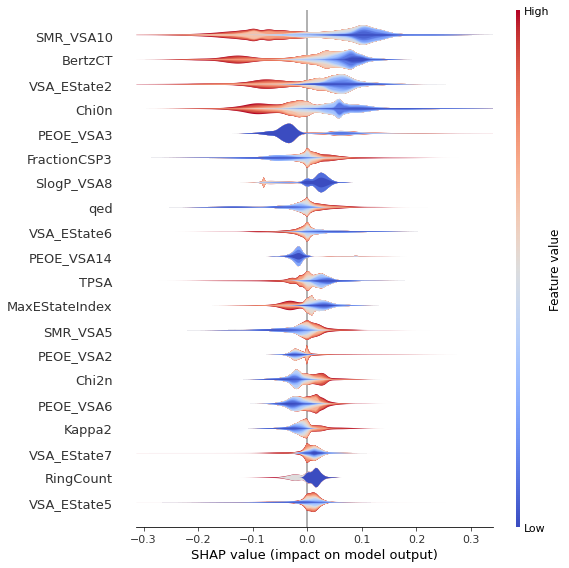

In [85]:
shap.summary_plot(shap_values2, features=X_test2, plot_type="layered_violin")

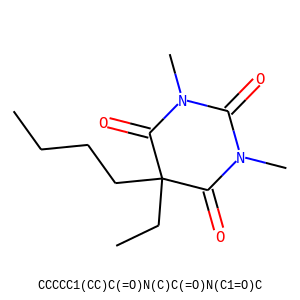

In [86]:
from rdkit import Chem
from rdkit.Chem import Draw

index = 0

smile = df['Open Babel SMILES'][X_test.index[index]]
mol = Chem.MolFromSmiles(smile)
mol.SetProp("_Name", smile)

# ノートブック上に描画
Draw.MolToImage(mol, legend=mol.GetProp("_Name"))

In [87]:
shap.initjs()
shap.force_plot(explainer2.expected_value, shap_values2[index,:], X_test2.iloc[index, :], link="logit")

In [88]:
shap.initjs()
shap.force_plot(explainer2.expected_value, shap_values2, X_test2)

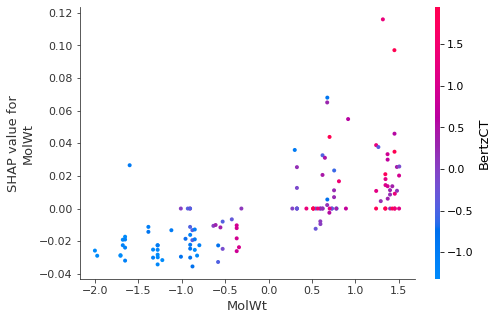

In [89]:
shap.dependence_plot("MolWt", shap_values2, X_test2)

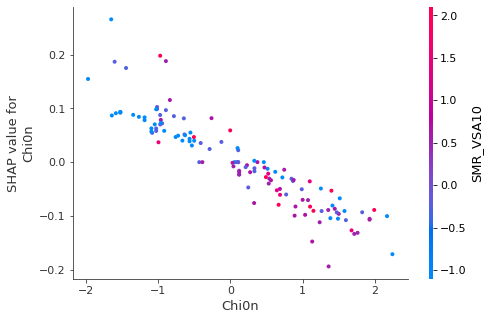

In [90]:
shap.dependence_plot("Chi0n", shap_values2, X_test2)

In [91]:
!date

Tue Feb  9 06:20:04 UTC 2021


# Objective 3: Dipole moment

In [92]:
import optuna
from scikitallstars import all_sklearn

objective3_fs = all_sklearn.Objective(X_train, y_train["Dipole moment"])
objective3_fs.set_model_names(['RandomForest'])

optuna.logging.set_verbosity(optuna.logging.WARN)
study3_fs = optuna.create_study(direction='maximize')
study3_fs.optimize(objective3_fs, timeout=100, n_trials=100, show_progress_bar=True)

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


In [93]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'objective3_fs.pkl', 'wb') as obj:
  pickle.dump(objective3_fs , obj)

In [94]:
feature_importances_df = pd.DataFrame(
    objective3_fs.best_models["RandomForest"].model.feature_importances_, 
    columns=["RF feature importance"],
    index=X_train.columns
    ).dropna().sort_values("RF feature importance", ascending=False)

feature_importances_df.style.bar(subset=["RF feature importance"], align='mid')

In [95]:
from sklearn.feature_selection import SelectFromModel

selector3 = SelectFromModel(estimator=objective3_fs.best_models["RandomForest"].model).fit(X_train, y_train["Dipole moment"])
X_train3 = X_train.iloc[:, selector3.get_support()]
X_test3 = X_test.iloc[:, selector3.get_support()]

In [96]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'selector3.pkl', 'wb') as obj:
  pickle.dump(selector3 , obj)

In [97]:
X_train3

MaxEStateIndex  MinEStateIndex  ...    fr_C_O  fr_phenol_noOrthoHbond
592        0.848839       -1.444520  ...  0.917537                1.204488
62        -0.853063        1.203738  ... -0.549132               -0.377340
232        0.130360        0.335932  ... -0.549132               -0.377340
379        0.947229       -0.939923  ...  0.917537               -0.377340
614        0.868706       -1.691600  ...  3.850876               -0.377340
..              ...             ...  ...       ...                     ...
428       -1.786464        1.418693  ... -0.549132               -0.377340
71         1.076101       -0.138346  ...  2.384207               -0.377340
506        1.111244       -0.873301  ...  2.384207               -0.377340
526        0.347270        0.421163  ... -0.549132                1.204488
362        0.968294       -1.876506  ...  0.917537               -0.377340

[506 rows x 58 columns]

In [98]:
import pandas as pd

df_concat = pd.concat([X_train3, y_train["Dipole moment"]], axis=1)

#pd.plotting.scatter_matrix(df_concat, figsize=(12, 12)) 
#plt.show()

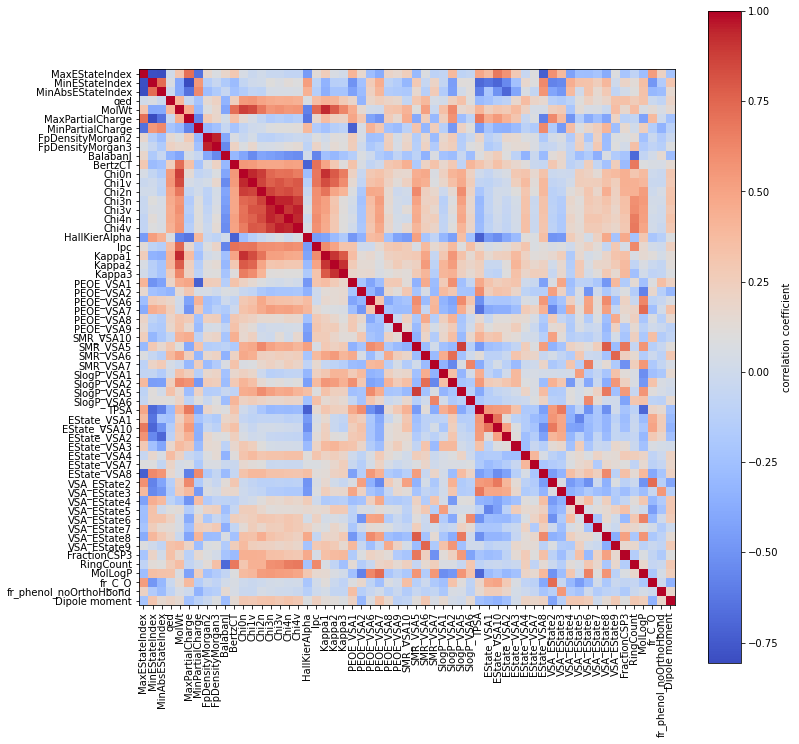

In [99]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 12))
corrcoef = np.corrcoef(df_concat.T.values.tolist())
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar(label='correlation coefficient')
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, df_concat.columns, rotation=90)
plt.yticks(tick_marks, df_concat.columns)
#plt.tight_layout()
plt.show()

In [100]:
pcaumap3 = all_sklearn.PCAUmap()
pcaumap3.fit(pd.concat([X_train3, X_test3]))

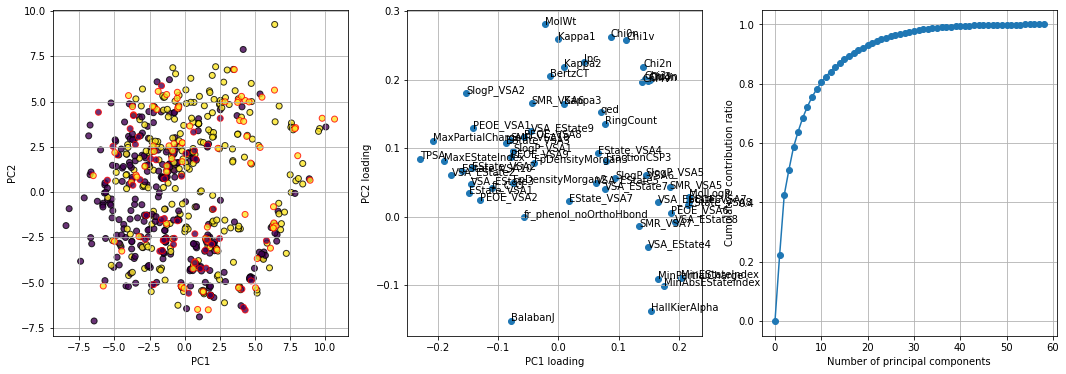

In [101]:
all_sklearn.pca_summary(pcaumap3.pca, X_train3, y_train['Dipole moment'], X_test3, y_test['Dipole moment'])

inside function
   (0, 0)	1.0
  (0, 49)	0.35098723
  (0, 53)	0.34960416
  (0, 91)	0.1437636
  (0, 145)	0.14496209
  (0, 174)	0.30946085
  (0, 224)	0.2667156
  (0, 243)	0.14019601
  (0, 358)	0.21928109
  (0, 373)	0.22223361
  (0, 413)	0.41857308
  (0, 454)	0.4171909
  (0, 521)	0.43190902
  (0, 589)	0.26133686
  (0, 627)	0.2306832
  (1, 1)	1.0
  (1, 58)	0.59382653
  (1, 138)	0.21352027
  (1, 185)	0.16090755
  (1, 204)	0.24803941
  (1, 372)	0.38061345
  (1, 390)	0.21153595
  (1, 427)	0.2483856
  (1, 470)	0.15852088
  (1, 480)	0.2298331
  :	:
  (504, 338)	0.17036378
  (504, 354)	0.17485644
  (504, 478)	0.23766099
  (504, 504)	1.0
  (504, 529)	0.40970755
  (504, 552)	0.3436375
  (504, 571)	0.16423564
  (504, 577)	0.27593747
  (504, 590)	0.36800376
  (504, 604)	0.15228969
  (505, 9)	0.3680065
  (505, 77)	0.25692278
  (505, 91)	0.2783358
  (505, 102)	0.28671464
  (505, 108)	0.24758862
  (505, 148)	0.28785574
  (505, 159)	0.27229857
  (505, 180)	0.28826293
  (505, 264)	0.25712964
  (505, 343)	

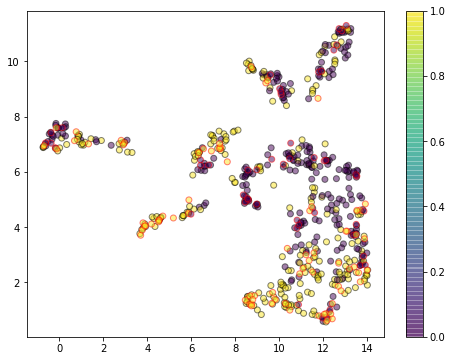

In [102]:
all_sklearn.show_pcaumap(pcaumap3, X_train3, y_train['Dipole moment'], X_test3, y_test['Dipole moment'])

In [103]:
!date

Tue Feb  9 06:21:02 UTC 2021


## 選択された特徴を用いた予測

In [104]:
import optuna
from scikitallstars import all_sklearn

objective3 = all_sklearn.Objective(X_train3, y_train["Dipole moment"])

optuna.logging.set_verbosity(optuna.logging.WARN)
model_names = objective3.get_model_names()
for model_name in model_names:
    objective3.set_model_names([model_name])
    study3 = optuna.create_study(direction='maximize')
    study3.optimize(objective3, timeout=100, n_trials=100, show_progress_bar=True)

objective3.set_model_names(model_names)
study3 = optuna.create_study(direction='maximize')
study3.optimize(objective3, timeout=100, n_trials=100, show_progress_bar=True)

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=530000).  Consider pre-processing your data wi

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


In [105]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'objective3.pkl', 'wb') as obj:
  pickle.dump(objective3 , obj)

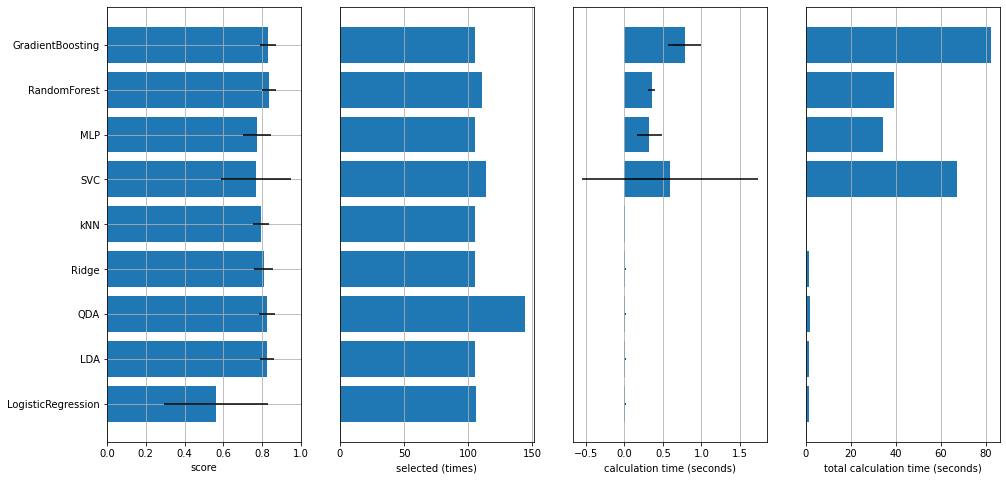

In [106]:
all_sklearn.objective_summary(objective3)

In [107]:
objective3.best_scores

{'GradientBoosting': 0.9541284403669724,
 'LDA': 0.9320388349514563,
 'LogisticRegression': 0.7889908256880735,
 'MLP': 0.9059829059829059,
 'QDA': 0.9464285714285714,
 'RandomForest': 0.9166666666666666,
 'Ridge': 0.920353982300885,
 'SVC': 0.923076923076923,
 'kNN': 0.9285714285714286}

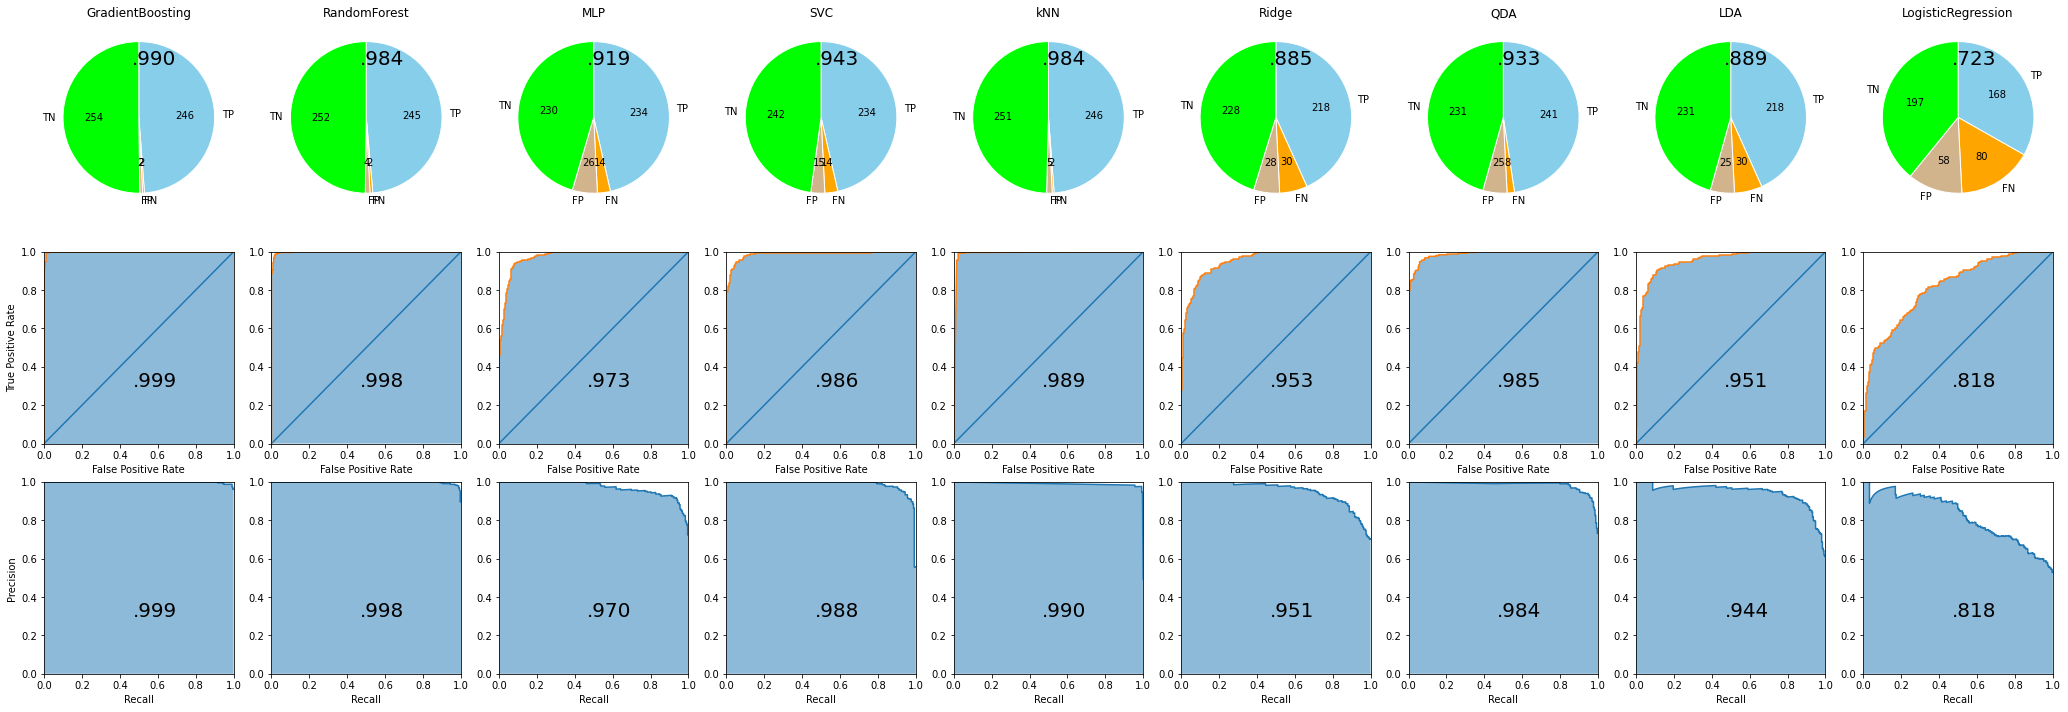

In [108]:
all_sklearn.show_allsklearn_metrics(objective3, X_train3, y_train["Dipole moment"])

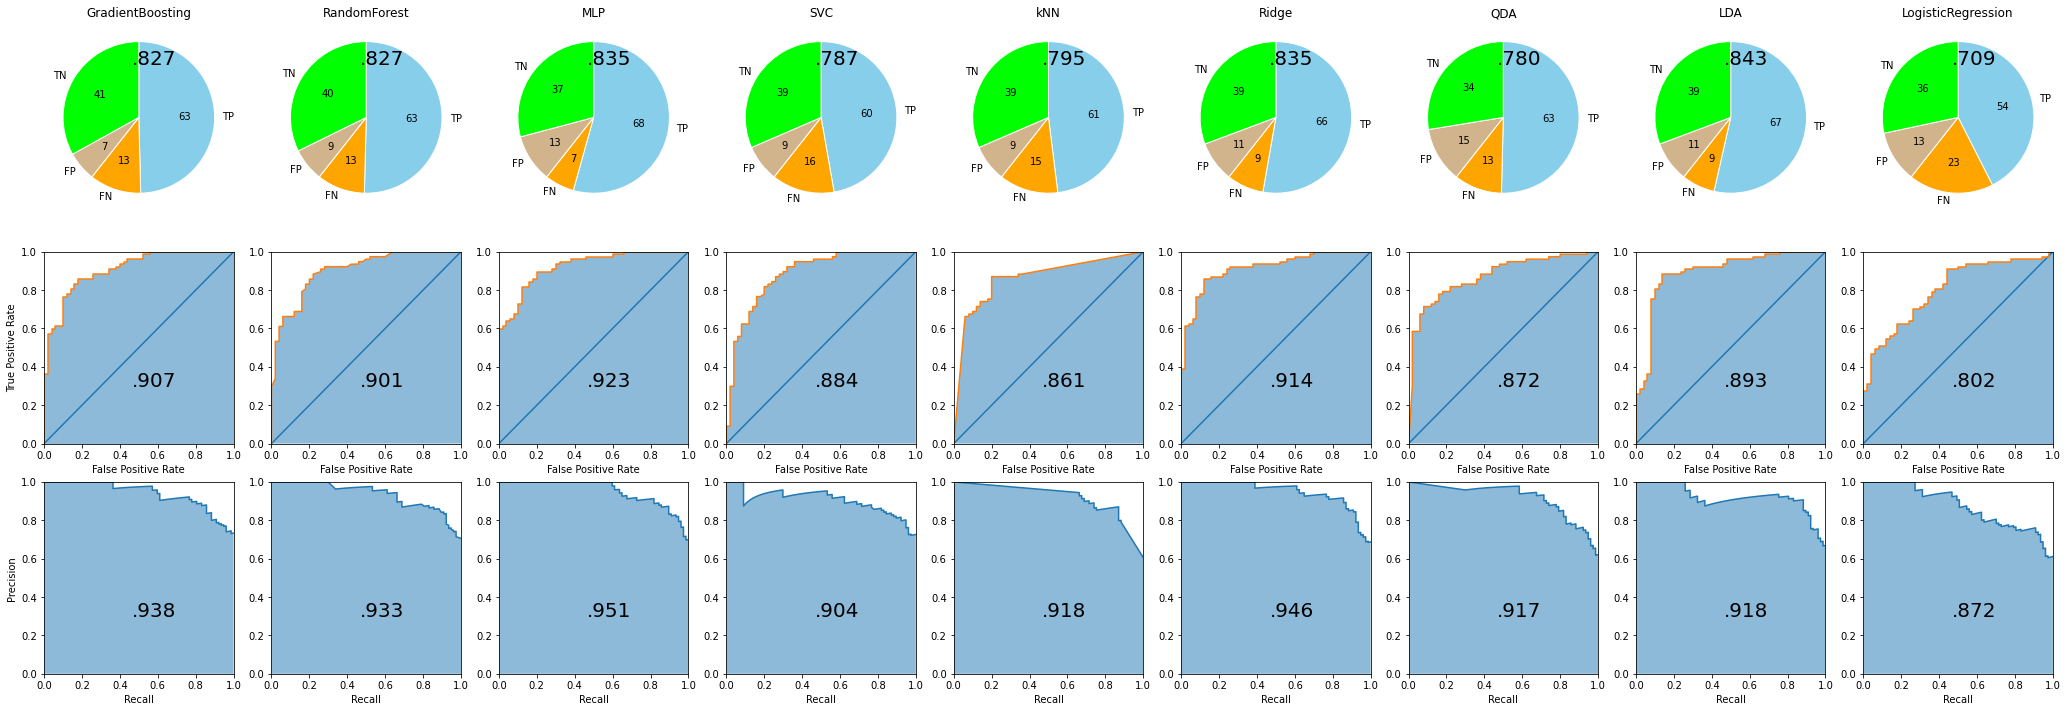

In [109]:
all_sklearn.show_allsklearn_metrics(objective3, X_test3, y_test["Dipole moment"])

inside function
   (0, 0)	1.0
  (0, 49)	0.35098723
  (0, 53)	0.34960416
  (0, 91)	0.1437636
  (0, 145)	0.14496209
  (0, 174)	0.30946085
  (0, 224)	0.2667156
  (0, 243)	0.14019601
  (0, 358)	0.21928109
  (0, 373)	0.22223361
  (0, 413)	0.41857308
  (0, 454)	0.4171909
  (0, 521)	0.43190902
  (0, 589)	0.26133686
  (0, 627)	0.2306832
  (1, 1)	1.0
  (1, 58)	0.59382653
  (1, 138)	0.21352027
  (1, 185)	0.16090755
  (1, 204)	0.24803941
  (1, 372)	0.38061345
  (1, 390)	0.21153595
  (1, 427)	0.2483856
  (1, 470)	0.15852088
  (1, 480)	0.2298331
  :	:
  (504, 338)	0.17036378
  (504, 354)	0.17485644
  (504, 478)	0.23766099
  (504, 504)	1.0
  (504, 529)	0.40970755
  (504, 552)	0.3436375
  (504, 571)	0.16423564
  (504, 577)	0.27593747
  (504, 590)	0.36800376
  (504, 604)	0.15228969
  (505, 9)	0.3680065
  (505, 77)	0.25692278
  (505, 91)	0.2783358
  (505, 102)	0.28671464
  (505, 108)	0.24758862
  (505, 148)	0.28785574
  (505, 159)	0.27229857
  (505, 180)	0.28826293
  (505, 264)	0.25712964
  (505, 343)	

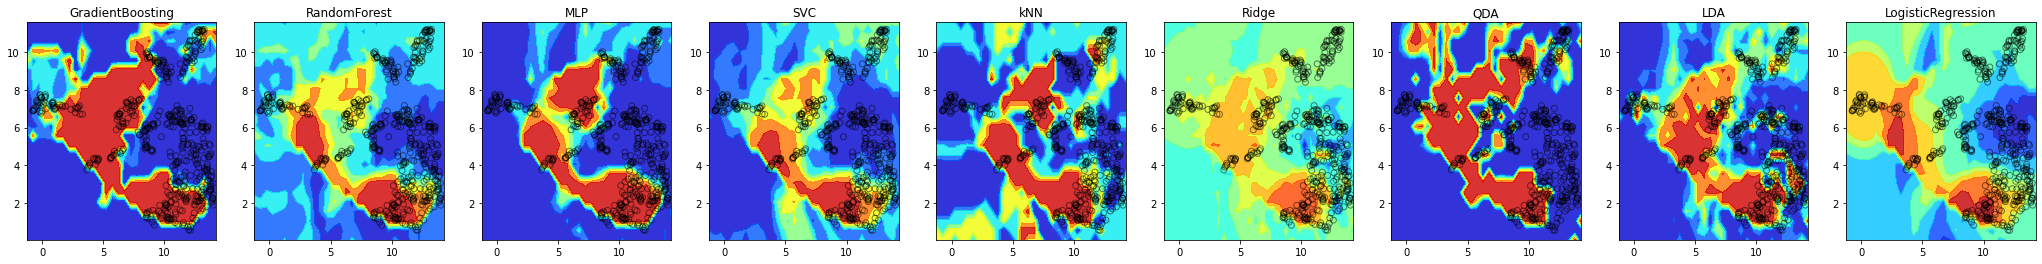

In [110]:
all_sklearn.show_allsklearn_pcaumap(objective3, pcaumap3, X_train3, X_test3)

In [111]:
!date

Tue Feb  9 06:26:37 UTC 2021


In [112]:
stacking_model3 = all_sklearn.stacking(objective3)
stacking_model3.fit(X_train3, y_train["Dipole moment"])
stacking_model3.score(X_test3, y_test["Dipole moment"])

0.84251968503937

In [113]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'stacking_model3.pkl', 'wb') as obj:
  pickle.dump(stacking_model3 , obj)

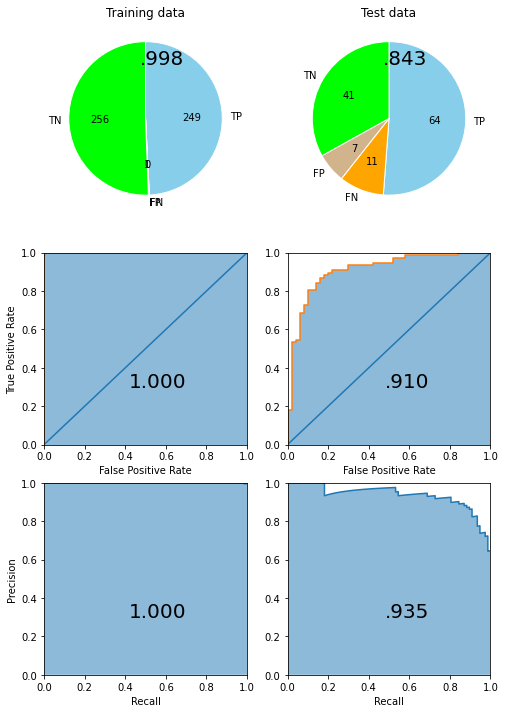

In [114]:
all_sklearn.show_metrics(stacking_model3, X_train3, X_test3, y_train["Dipole moment"], y_test["Dipole moment"])

inside function
   (0, 0)	1.0
  (0, 49)	0.35098723
  (0, 53)	0.34960416
  (0, 91)	0.1437636
  (0, 145)	0.14496209
  (0, 174)	0.30946085
  (0, 224)	0.2667156
  (0, 243)	0.14019601
  (0, 358)	0.21928109
  (0, 373)	0.22223361
  (0, 413)	0.41857308
  (0, 454)	0.4171909
  (0, 521)	0.43190902
  (0, 589)	0.26133686
  (0, 627)	0.2306832
  (1, 1)	1.0
  (1, 58)	0.59382653
  (1, 138)	0.21352027
  (1, 185)	0.16090755
  (1, 204)	0.24803941
  (1, 372)	0.38061345
  (1, 390)	0.21153595
  (1, 427)	0.2483856
  (1, 470)	0.15852088
  (1, 480)	0.2298331
  :	:
  (504, 338)	0.17036378
  (504, 354)	0.17485644
  (504, 478)	0.23766099
  (504, 504)	1.0
  (504, 529)	0.40970755
  (504, 552)	0.3436375
  (504, 571)	0.16423564
  (504, 577)	0.27593747
  (504, 590)	0.36800376
  (504, 604)	0.15228969
  (505, 9)	0.3680065
  (505, 77)	0.25692278
  (505, 91)	0.2783358
  (505, 102)	0.28671464
  (505, 108)	0.24758862
  (505, 148)	0.28785574
  (505, 159)	0.27229857
  (505, 180)	0.28826293
  (505, 264)	0.25712964
  (505, 343)	

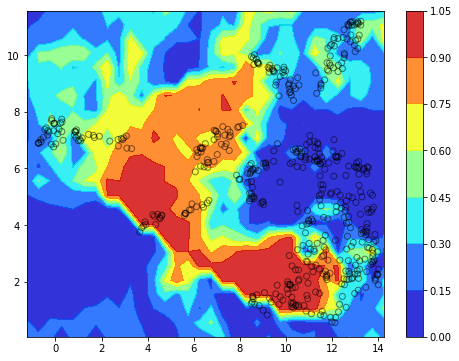

In [115]:
all_sklearn.show_pcaumap(pcaumap3, X_train3, X_test3, model=stacking_model3)

In [116]:
!date

Tue Feb  9 06:27:01 UTC 2021


In [117]:
import shap 

sample_size = 100
pred_func = lambda X: stacking_model3.predict(X).ravel()
explainer3 = shap.KernelExplainer(pred_func, shap.kmeans(X_test3, sample_size))
shap_values3 = explainer3.shap_values(X_test3)

In [118]:
import pickle

# 学習済みモデルをGoogle Driveに保存
with open(drive_path + 'shap_values3.pkl', 'wb') as obj:
  pickle.dump(shap_values3 , obj)

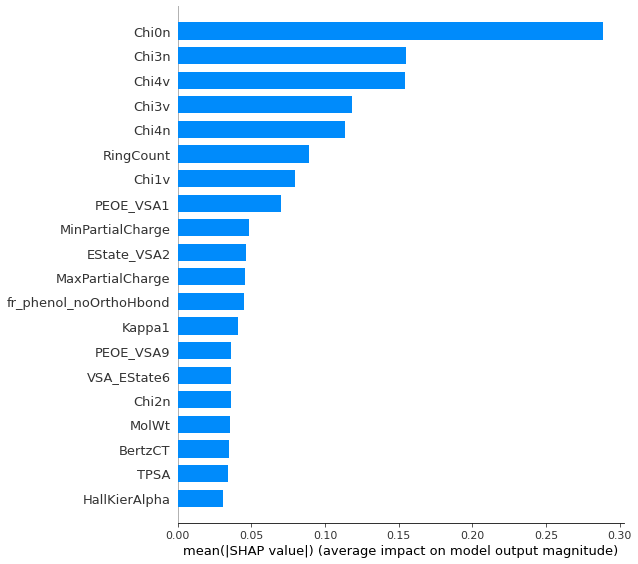

In [119]:
shap.summary_plot(shap_values3, features=X_test3, plot_type="bar")

In [120]:
global_shap_values = np.abs(shap_values3).mean(0)
shap_corr = [np.corrcoef(shap_values3[:, i], X_test3.iloc[:, i])[0, 1] for i in range(len(shap_values3.T))]
global_shap_coefs = np.array(global_shap_values) * np.array(shap_corr)

global_shap_coefs_df = pd.DataFrame(
    global_shap_coefs, 
    columns=["Global SHAP coef"],
    index=X_test3.columns
    ).dropna().sort_values("Global SHAP coef", ascending=False)

global_shap_coefs_df.style.bar(subset=["Global SHAP coef"], align='mid')

not enough data in bin #4 for feature fr_phenol_noOrthoHbond, so it'll be ignored. Try increasing the number of records to plot.


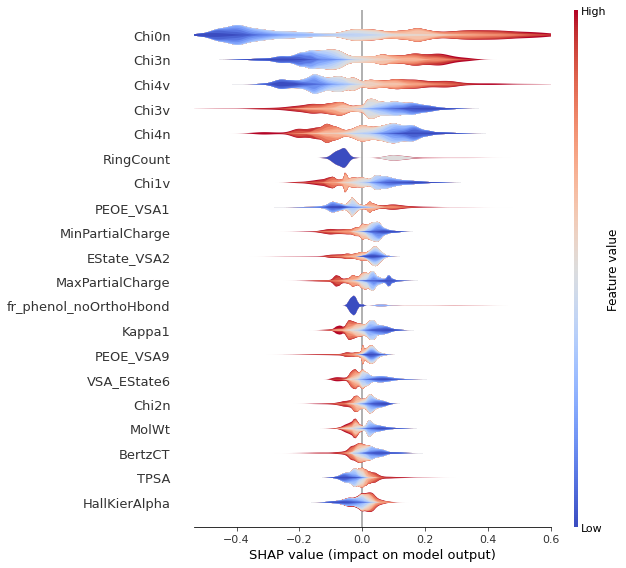

In [121]:
shap.summary_plot(shap_values3, features=X_test3, plot_type="layered_violin")

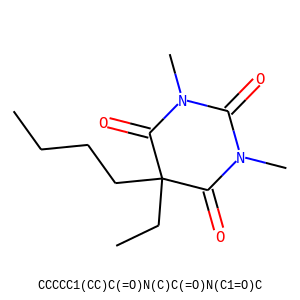

In [122]:
from rdkit import Chem
from rdkit.Chem import Draw

index = 0

smile = df['Open Babel SMILES'][X_test.index[index]]
mol = Chem.MolFromSmiles(smile)
mol.SetProp("_Name", smile)

# ノートブック上に描画
Draw.MolToImage(mol, legend=mol.GetProp("_Name"))

In [123]:
shap.initjs()
shap.force_plot(explainer3.expected_value, shap_values3[index,:], X_test3.iloc[index,:], link="logit")

In [124]:
shap.initjs()
shap.force_plot(explainer3.expected_value, shap_values3, X_test3)

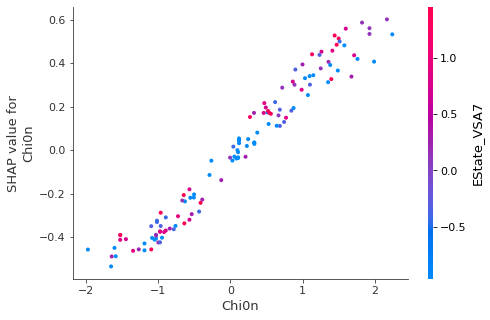

In [125]:
shap.dependence_plot("Chi0n", shap_values3, X_test3)

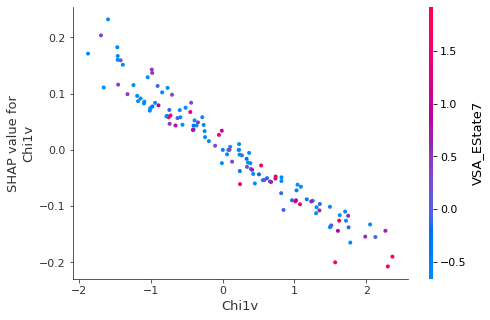

In [126]:
shap.dependence_plot("Chi1v", shap_values3, X_test3)

In [127]:
!date

Tue Feb  9 07:19:39 UTC 2021
